In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [50]:
data = pd.read_csv('weatherAUS.csv')
data

Date Location  MinTemp  MaxTemp  Rainfall WindGustDir  \
0       12/1/2008   Albury     13.4     22.9       0.6           W   
1       12/2/2008   Albury      7.4     25.1       0.0         WNW   
2       12/3/2008   Albury     12.9     25.7       0.0         WSW   
3       12/4/2008   Albury      9.2     28.0       0.0          NE   
4       12/5/2008   Albury     17.5     32.3       1.0           W   
...           ...      ...      ...      ...       ...         ...   
145455  6/21/2017    Uluru      2.8     23.4       0.0           E   
145456  6/22/2017    Uluru      3.6     25.3       0.0         NNW   
145457  6/23/2017    Uluru      5.4     26.9       0.0           N   
145458  6/24/2017    Uluru      7.8     27.0       0.0          SE   
145459  6/25/2017    Uluru     14.9      NaN       0.0         NaN   

        WindGustSpeed WindDir9am WindDir3pm  WindSpeed9am  WindSpeed3pm  \
0                44.0          W        WNW          20.0          24.0   
1                44.0        NNW        WSW           4.0          22.0   
2                46.0          W        WSW          19.0          26.0   
3                24.0         SE          E          11.0           9.0   
4                41.0        ENE         NW           7.0          20.0   
...               ...        ...        ...           ...           ...   
145455           31.0         SE        ENE          13.0          11.0   
145456           22.0         SE          N          13.0           9.0   
145457           37.0         SE        WNW           9.0           9.0   
145458           28.0        SSE          N          13.0           7.0   
145459            NaN        ESE        ESE          17.0          17.0   

        Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0              71.0         22.0       1007.7       1007.1     16.9     21.8   
1              44.0         25.0       1010.6       1007.8     17.2     24.3   
2              38.0         30.0       1007.6       1008.7     21.0     23.2   
3              45.0         16.0       1017.6       1012.8     18.1     26.5   
4              82.0         33.0       1010.8       1006.0     17.8     29.7   
...             ...          ...          ...          ...      ...      ...   
145455         51.0         24.0       1024.6       1020.3     10.1     22.4   
145456         56.0         21.0       1023.5       1019.1     10.9     24.5   
145457         53.0         24.0       1021.0       1016.8     12.5     26.1   
145458         51.0         24.0       1019.4       1016.5     15.1     26.0   
145459         62.0         36.0       1020.2       1017.9     15.0     20.9   

       RainToday RainTomorrow  
0             No           No  
1             No           No  
2             No           No  
3             No           No  
4             No           No  
...          ...          ...  
145455        No           No  
145456        No           No  
145457        No           No  
145458        No           No  
145459        No          NaN  

[145460 rows x 19 columns]

In [51]:
###   making dataframe just with numeric columns and putting target in last column
df = pd.DataFrame(data,columns =['Date','Location','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
df

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0       12/1/2008   Albury     13.4     22.9           44.0          20.0   
1       12/2/2008   Albury      7.4     25.1           44.0           4.0   
2       12/3/2008   Albury     12.9     25.7           46.0          19.0   
3       12/4/2008   Albury      9.2     28.0           24.0          11.0   
4       12/5/2008   Albury     17.5     32.3           41.0           7.0   
...           ...      ...      ...      ...            ...           ...   
145455  6/21/2017    Uluru      2.8     23.4           31.0          13.0   
145456  6/22/2017    Uluru      3.6     25.3           22.0          13.0   
145457  6/23/2017    Uluru      5.4     26.9           37.0           9.0   
145458  6/24/2017    Uluru      7.8     27.0           28.0          13.0   
145459  6/25/2017    Uluru     14.9      NaN            NaN          17.0   

        WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0               24.0         71.0         22.0       1007.7       1007.1   
1               22.0         44.0         25.0       1010.6       1007.8   
2               26.0         38.0         30.0       1007.6       1008.7   
3                9.0         45.0         16.0       1017.6       1012.8   
4               20.0         82.0         33.0       1010.8       1006.0   
...              ...          ...          ...          ...          ...   
145455          11.0         51.0         24.0       1024.6       1020.3   
145456           9.0         56.0         21.0       1023.5       1019.1   
145457           9.0         53.0         24.0       1021.0       1016.8   
145458           7.0         51.0         24.0       1019.4       1016.5   
145459          17.0         62.0         36.0       1020.2       1017.9   

        Temp9am  Temp3pm  Rainfall  
0          16.9     21.8       0.6  
1          17.2     24.3       0.0  
2          21.0     23.2       0.0  
3          18.1     26.5       0.0  
4          17.8     29.7       1.0  
...         ...      ...       ...  
145455     10.1     22.4       0.0  
145456     10.9     24.5       0.0  
145457     12.5     26.1       0.0  
145458     15.1     26.0       0.0  
145459     15.0     20.9       0.0  

[145460 rows x 14 columns]

In [52]:
######################### selecting three cities of data ###################

In [53]:
df_Albury = df[df['Location'] == 'Albury']
df_Albury 

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0     12/1/2008   Albury     13.4     22.9           44.0          20.0   
1     12/2/2008   Albury      7.4     25.1           44.0           4.0   
2     12/3/2008   Albury     12.9     25.7           46.0          19.0   
3     12/4/2008   Albury      9.2     28.0           24.0          11.0   
4     12/5/2008   Albury     17.5     32.3           41.0           7.0   
...         ...      ...      ...      ...            ...           ...   
3035  6/21/2017   Albury      1.2     15.2           15.0           0.0   
3036  6/22/2017   Albury      0.8     13.4           17.0           6.0   
3037  6/23/2017   Albury      1.1     11.9           44.0           9.0   
3038  6/24/2017   Albury      1.1     14.1           28.0           4.0   
3039  6/25/2017   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0  

[3040 rows x 14 columns]

In [54]:
####################   Preprocessing for Albury (missing values and noise)   ###################

In [55]:
df_Albury.tail()

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
3035  6/21/2017   Albury      1.2     15.2           15.0           0.0   
3036  6/22/2017   Albury      0.8     13.4           17.0           6.0   
3037  6/23/2017   Albury      1.1     11.9           44.0           9.0   
3038  6/24/2017   Albury      1.1     14.1           28.0           4.0   
3039  6/25/2017   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0

In [56]:
df_Albury.sort_values(by=["Date"])
df_Albury

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0     12/1/2008   Albury     13.4     22.9           44.0          20.0   
1     12/2/2008   Albury      7.4     25.1           44.0           4.0   
2     12/3/2008   Albury     12.9     25.7           46.0          19.0   
3     12/4/2008   Albury      9.2     28.0           24.0          11.0   
4     12/5/2008   Albury     17.5     32.3           41.0           7.0   
...         ...      ...      ...      ...            ...           ...   
3035  6/21/2017   Albury      1.2     15.2           15.0           0.0   
3036  6/22/2017   Albury      0.8     13.4           17.0           6.0   
3037  6/23/2017   Albury      1.1     11.9           44.0           9.0   
3038  6/24/2017   Albury      1.1     14.1           28.0           4.0   
3039  6/25/2017   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0  

[3040 rows x 14 columns]

<ipython-input-57-6c6facd42a7b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Albury['Date']=pd.to_datetime(df_Albury.Date)


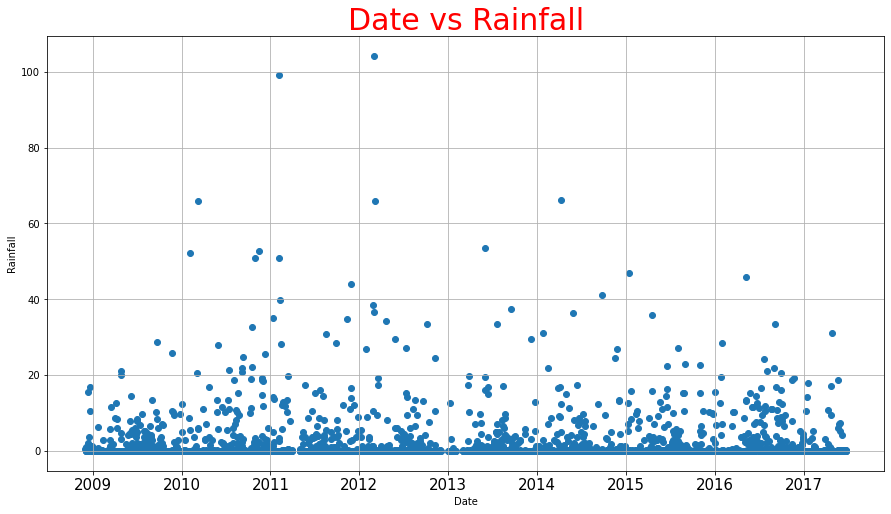

In [57]:
#plot Date & Rainfall to find noise
df_Albury['Date']=pd.to_datetime(df_Albury.Date)
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Date'],df_Albury['Rainfall'])
plt.title('Date vs Rainfall',fontsize=30,c='red')
plt.xlabel("Date")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

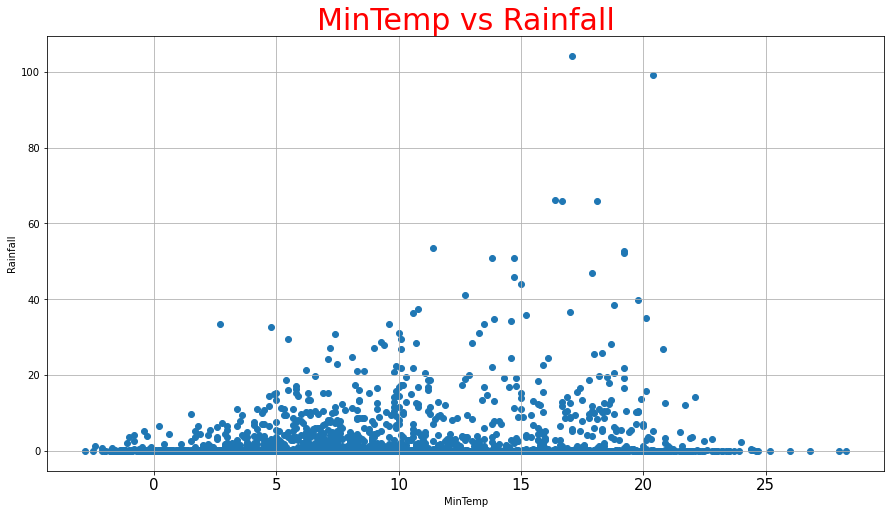

In [58]:
#plot MinTemp & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['MinTemp'],df_Albury['Rainfall'])
plt.title('MinTemp vs Rainfall',fontsize=30,c='red')
plt.xlabel("MinTemp")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

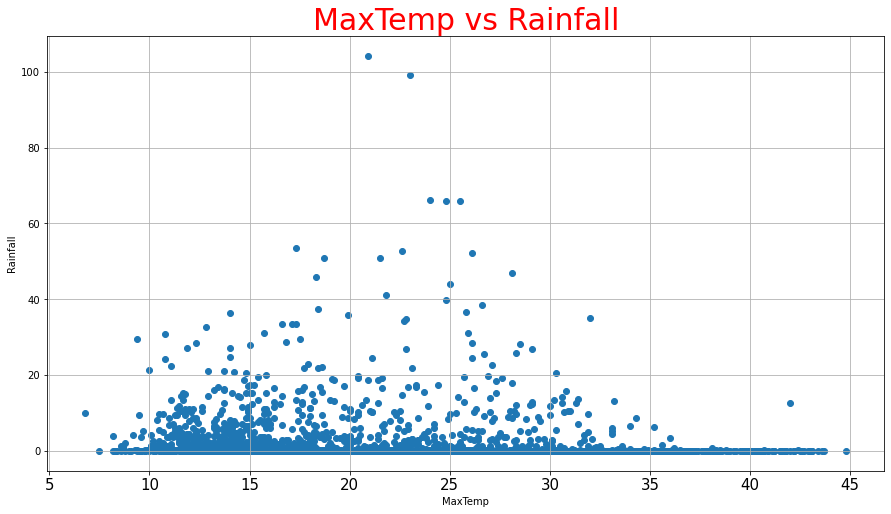

In [59]:
#plot MaxTemp & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['MaxTemp'],df_Albury['Rainfall'])
plt.title('MaxTemp vs Rainfall',fontsize=30,c='red')
plt.xlabel("MaxTemp")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

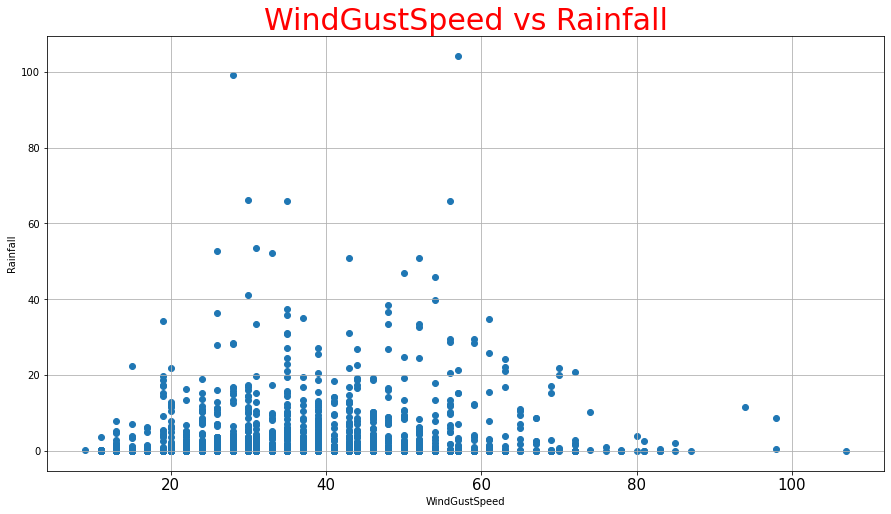

In [60]:
#plot WindGustSpeed Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['WindGustSpeed'],df_Albury['Rainfall'])
plt.title('WindGustSpeed vs Rainfall',fontsize=30,c='red')
plt.xlabel("WindGustSpeed")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

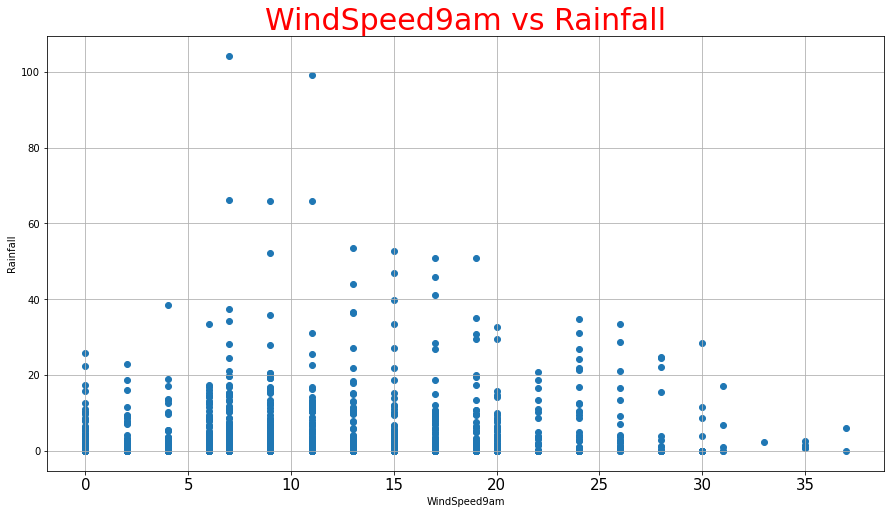

In [61]:
#plot WindSpeed9am & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['WindSpeed9am'],df_Albury['Rainfall'])
plt.title('WindSpeed9am vs Rainfall',fontsize=30,c='red')
plt.xlabel("WindSpeed9am")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

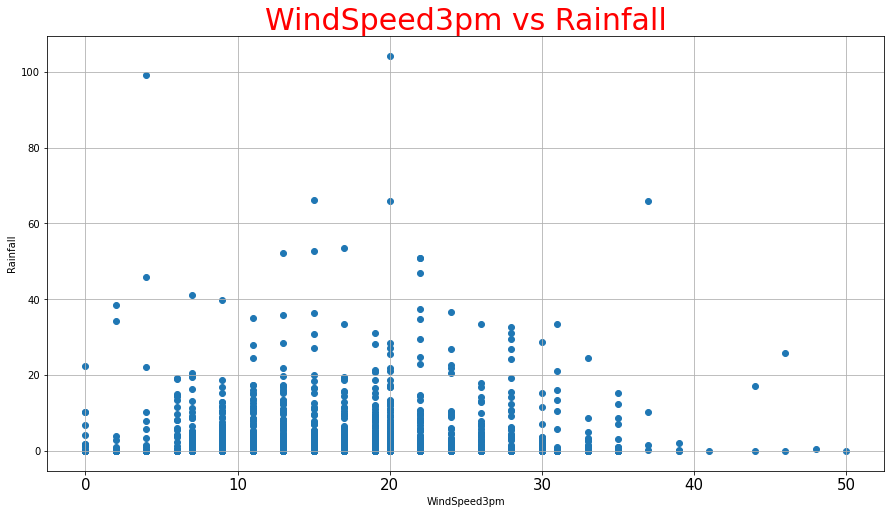

In [62]:
#plot WindSpeed3pm & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['WindSpeed3pm'],df_Albury['Rainfall'])
plt.title('WindSpeed3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("WindSpeed3pm")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

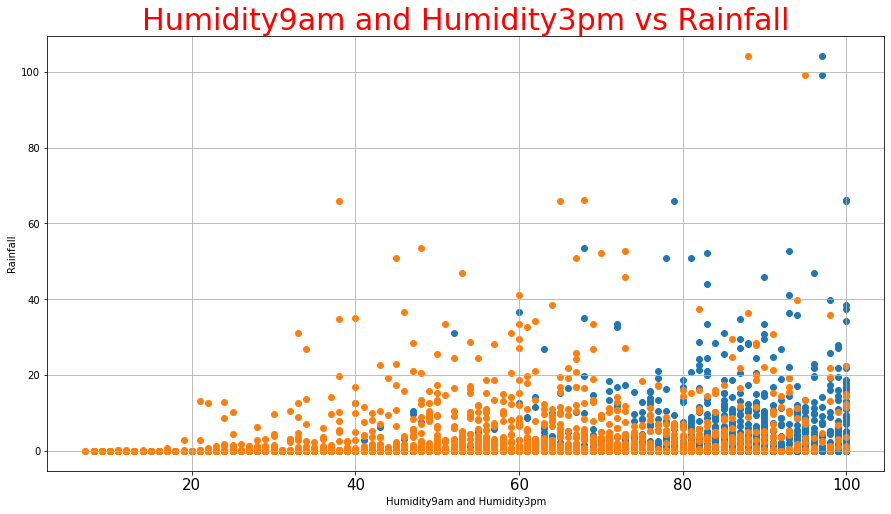

In [63]:
#plot Humidity9am and Humidity3pm & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Humidity9am'],df_Albury['Rainfall'])
plt.scatter(df_Albury['Humidity3pm'],df_Albury['Rainfall'])
plt.title('Humidity9am and Humidity3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("Humidity9am and Humidity3pm")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

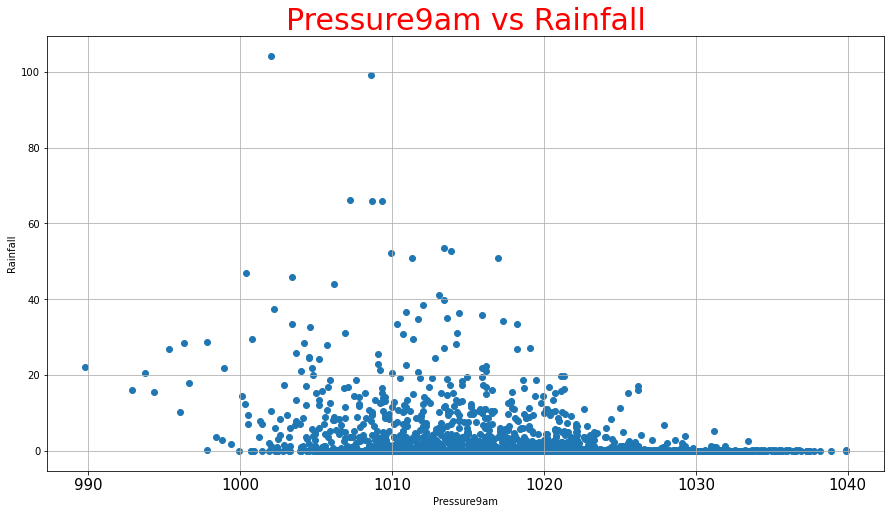

In [64]:
#plot Pressure9am & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Pressure9am'],df_Albury['Rainfall'])
plt.title('Pressure9am vs Rainfall',fontsize=30,c='red')
plt.xlabel("Pressure9am")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

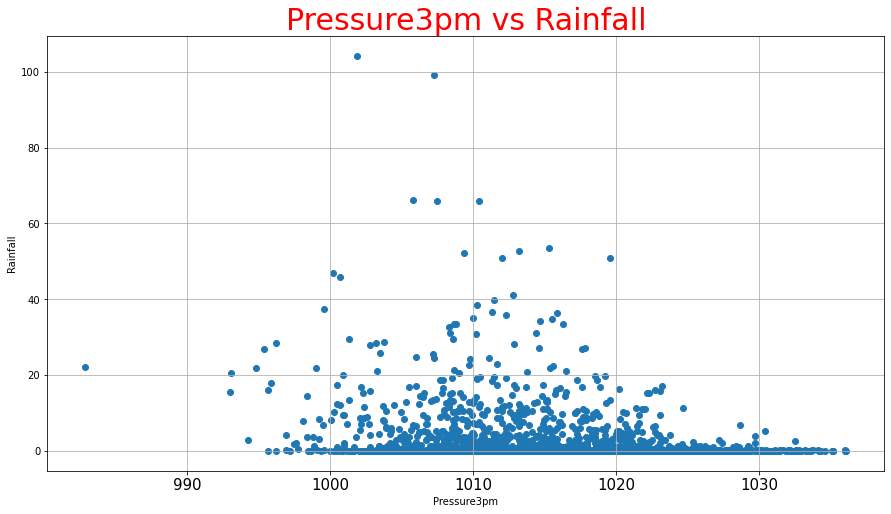

In [65]:
#plot Pressure3pm & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Pressure3pm'],df_Albury['Rainfall'])
plt.title('Pressure3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("Pressure3pm")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

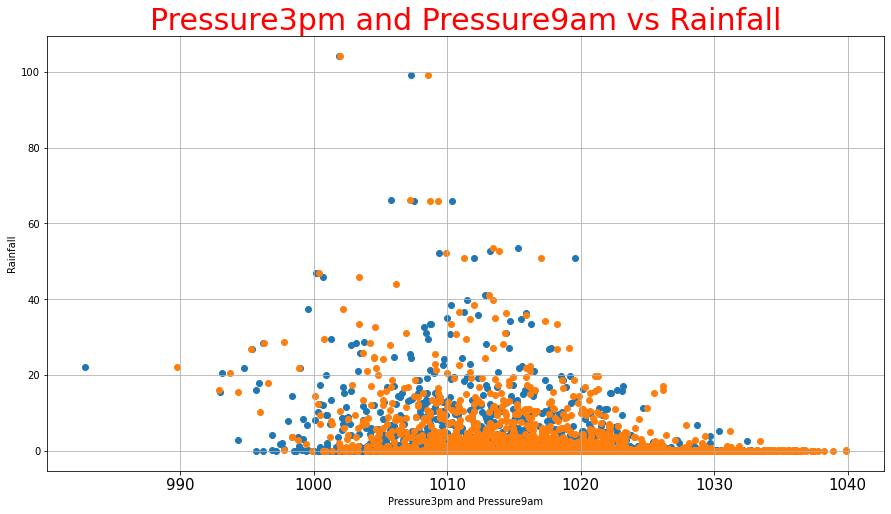

In [66]:
#plot Pressure3pm & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Pressure3pm'],df_Albury['Rainfall'])
plt.scatter(df_Albury['Pressure9am'],df_Albury['Rainfall'])
plt.title('Pressure3pm and Pressure9am vs Rainfall',fontsize=30,c='red')
plt.xlabel("Pressure3pm and Pressure9am")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

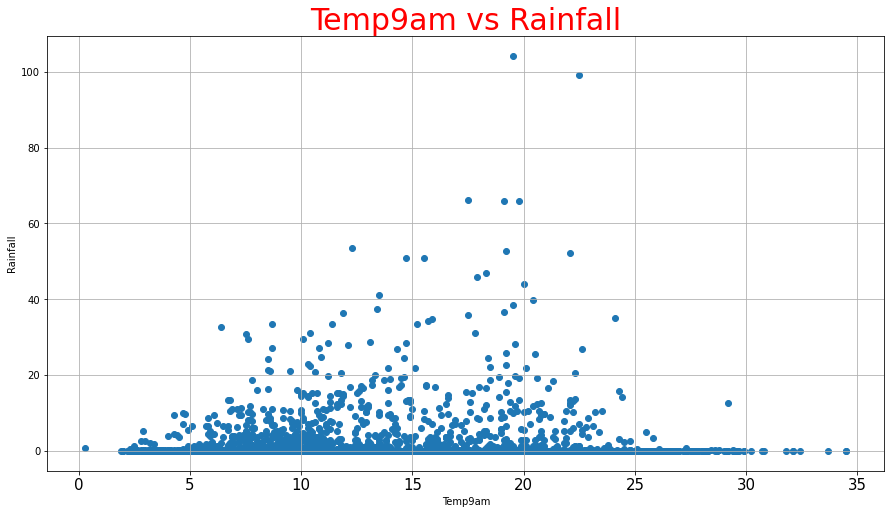

In [67]:
#plot Temp9am & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Temp9am'],df_Albury['Rainfall'])
plt.title('Temp9am vs Rainfall',fontsize=30,c='red')
plt.xlabel("Temp9am")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

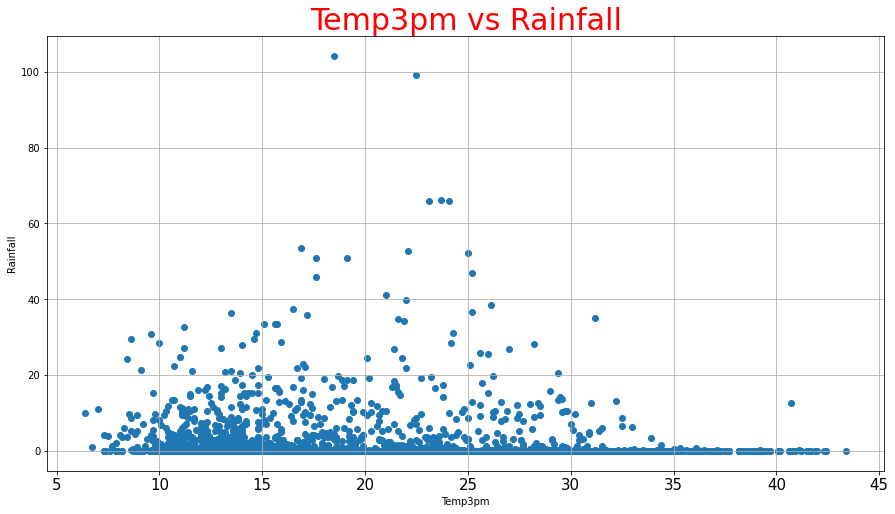

In [68]:
#plot Temp3pm & Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Temp3pm'],df_Albury['Rainfall'])
plt.title('Temp3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("Temp3pm")
plt.xticks(fontsize=15)
plt.ylabel("Rainfall")
plt.grid()
plt.show()

In [69]:
################  we dont have any noise ##################

In [70]:
##################### handling missing values ##########

In [71]:
df_Albury.reset_index(drop = True,inplace = True)
df_Albury

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0    2008-12-01   Albury     13.4     22.9           44.0          20.0   
1    2008-12-02   Albury      7.4     25.1           44.0           4.0   
2    2008-12-03   Albury     12.9     25.7           46.0          19.0   
3    2008-12-04   Albury      9.2     28.0           24.0          11.0   
4    2008-12-05   Albury     17.5     32.3           41.0           7.0   
...         ...      ...      ...      ...            ...           ...   
3035 2017-06-21   Albury      1.2     15.2           15.0           0.0   
3036 2017-06-22   Albury      0.8     13.4           17.0           6.0   
3037 2017-06-23   Albury      1.1     11.9           44.0           9.0   
3038 2017-06-24   Albury      1.1     14.1           28.0           4.0   
3039 2017-06-25   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0  

[3040 rows x 14 columns]

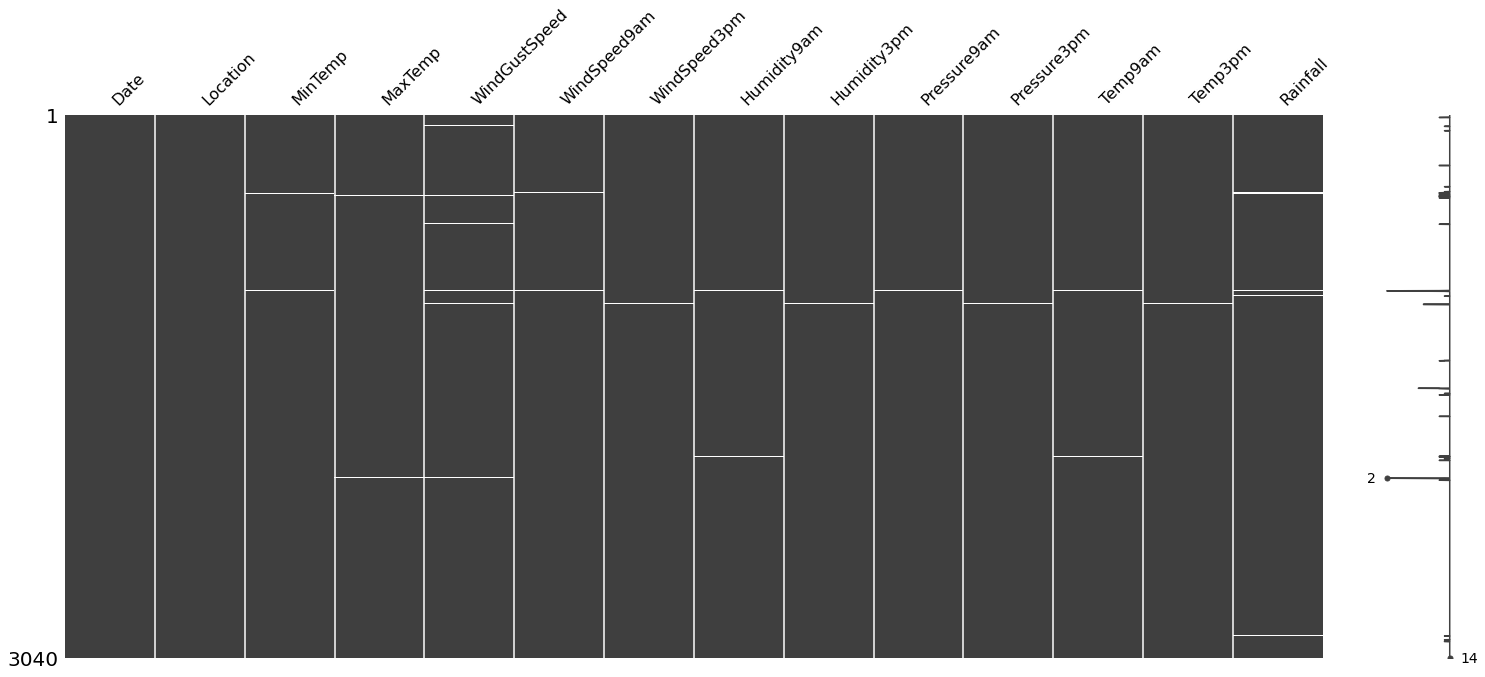

In [72]:
#view missing values
import missingno as msno
msno.matrix(df_Albury)
plt.show()

In [73]:
#########how many  missing values in each index(row)  #########
for i in range(len(df_Albury.index)):
    print(("total nan in row" , i , ":"),df_Albury.iloc[i].isnull().sum())

('total nan in row', 0, ':') 0
('total nan in row', 1, ':') 0
('total nan in row', 2, ':') 0
('total nan in row', 3, ':') 0
('total nan in row', 4, ':') 0
('total nan in row', 5, ':') 0
('total nan in row', 6, ':') 0
('total nan in row', 7, ':') 0
('total nan in row', 8, ':') 0
('total nan in row', 9, ':') 0
('total nan in row', 10, ':') 0
('total nan in row', 11, ':') 0
('total nan in row', 12, ':') 0
('total nan in row', 13, ':') 0
('total nan in row', 14, ':') 1
('total nan in row', 15, ':') 2
('total nan in row', 16, ':') 0
('total nan in row', 17, ':') 0
('total nan in row', 18, ':') 0
('total nan in row', 19, ':') 0
('total nan in row', 20, ':') 0
('total nan in row', 21, ':') 0
('total nan in row', 22, ':') 0
('total nan in row', 23, ':') 0
('total nan in row', 24, ':') 0
('total nan in row', 25, ':') 0
('total nan in row', 26, ':') 0
('total nan in row', 27, ':') 0
('total nan in row', 28, ':') 0
('total nan in row', 29, ':') 0
('total nan in row', 30, ':') 0
('total nan in row

('total nan in row', 419, ':') 0
('total nan in row', 420, ':') 0
('total nan in row', 421, ':') 0
('total nan in row', 422, ':') 0
('total nan in row', 423, ':') 0
('total nan in row', 424, ':') 0
('total nan in row', 425, ':') 0
('total nan in row', 426, ':') 0
('total nan in row', 427, ':') 0
('total nan in row', 428, ':') 0
('total nan in row', 429, ':') 0
('total nan in row', 430, ':') 1
('total nan in row', 431, ':') 0
('total nan in row', 432, ':') 0
('total nan in row', 433, ':') 0
('total nan in row', 434, ':') 0
('total nan in row', 435, ':') 1
('total nan in row', 436, ':') 2
('total nan in row', 437, ':') 1
('total nan in row', 438, ':') 2
('total nan in row', 439, ':') 0
('total nan in row', 440, ':') 0
('total nan in row', 441, ':') 0
('total nan in row', 442, ':') 0
('total nan in row', 443, ':') 1
('total nan in row', 444, ':') 2
('total nan in row', 445, ':') 0
('total nan in row', 446, ':') 0
('total nan in row', 447, ':') 0
('total nan in row', 448, ':') 0
('total na

('total nan in row', 730, ':') 0
('total nan in row', 731, ':') 0
('total nan in row', 732, ':') 0
('total nan in row', 733, ':') 0
('total nan in row', 734, ':') 0
('total nan in row', 735, ':') 0
('total nan in row', 736, ':') 0
('total nan in row', 737, ':') 0
('total nan in row', 738, ':') 0
('total nan in row', 739, ':') 0
('total nan in row', 740, ':') 0
('total nan in row', 741, ':') 0
('total nan in row', 742, ':') 0
('total nan in row', 743, ':') 0
('total nan in row', 744, ':') 0
('total nan in row', 745, ':') 0
('total nan in row', 746, ':') 0
('total nan in row', 747, ':') 0
('total nan in row', 748, ':') 0
('total nan in row', 749, ':') 0
('total nan in row', 750, ':') 0
('total nan in row', 751, ':') 0
('total nan in row', 752, ':') 0
('total nan in row', 753, ':') 0
('total nan in row', 754, ':') 0
('total nan in row', 755, ':') 0
('total nan in row', 756, ':') 0
('total nan in row', 757, ':') 0
('total nan in row', 758, ':') 0
('total nan in row', 759, ':') 0
('total na

('total nan in row', 1039, ':') 0
('total nan in row', 1040, ':') 0
('total nan in row', 1041, ':') 0
('total nan in row', 1042, ':') 0
('total nan in row', 1043, ':') 0
('total nan in row', 1044, ':') 0
('total nan in row', 1045, ':') 0
('total nan in row', 1046, ':') 0
('total nan in row', 1047, ':') 0
('total nan in row', 1048, ':') 0
('total nan in row', 1049, ':') 0
('total nan in row', 1050, ':') 0
('total nan in row', 1051, ':') 0
('total nan in row', 1052, ':') 0
('total nan in row', 1053, ':') 0
('total nan in row', 1054, ':') 0
('total nan in row', 1055, ':') 0
('total nan in row', 1056, ':') 0
('total nan in row', 1057, ':') 0
('total nan in row', 1058, ':') 5
('total nan in row', 1059, ':') 5
('total nan in row', 1060, ':') 5
('total nan in row', 1061, ':') 5
('total nan in row', 1062, ':') 0
('total nan in row', 1063, ':') 0
('total nan in row', 1064, ':') 0
('total nan in row', 1065, ':') 0
('total nan in row', 1066, ':') 0
('total nan in row', 1067, ':') 0
('total nan in

('total nan in row', 1422, ':') 0
('total nan in row', 1423, ':') 0
('total nan in row', 1424, ':') 0
('total nan in row', 1425, ':') 0
('total nan in row', 1426, ':') 0
('total nan in row', 1427, ':') 0
('total nan in row', 1428, ':') 0
('total nan in row', 1429, ':') 0
('total nan in row', 1430, ':') 0
('total nan in row', 1431, ':') 0
('total nan in row', 1432, ':') 0
('total nan in row', 1433, ':') 0
('total nan in row', 1434, ':') 0
('total nan in row', 1435, ':') 0
('total nan in row', 1436, ':') 0
('total nan in row', 1437, ':') 0
('total nan in row', 1438, ':') 0
('total nan in row', 1439, ':') 0
('total nan in row', 1440, ':') 0
('total nan in row', 1441, ':') 0
('total nan in row', 1442, ':') 0
('total nan in row', 1443, ':') 0
('total nan in row', 1444, ':') 0
('total nan in row', 1445, ':') 0
('total nan in row', 1446, ':') 0
('total nan in row', 1447, ':') 0
('total nan in row', 1448, ':') 0
('total nan in row', 1449, ':') 0
('total nan in row', 1450, ':') 0
('total nan in

('total nan in row', 1673, ':') 0
('total nan in row', 1674, ':') 0
('total nan in row', 1675, ':') 0
('total nan in row', 1676, ':') 0
('total nan in row', 1677, ':') 0
('total nan in row', 1678, ':') 0
('total nan in row', 1679, ':') 0
('total nan in row', 1680, ':') 0
('total nan in row', 1681, ':') 0
('total nan in row', 1682, ':') 0
('total nan in row', 1683, ':') 0
('total nan in row', 1684, ':') 0
('total nan in row', 1685, ':') 0
('total nan in row', 1686, ':') 2
('total nan in row', 1687, ':') 0
('total nan in row', 1688, ':') 0
('total nan in row', 1689, ':') 0
('total nan in row', 1690, ':') 0
('total nan in row', 1691, ':') 0
('total nan in row', 1692, ':') 0
('total nan in row', 1693, ':') 0
('total nan in row', 1694, ':') 0
('total nan in row', 1695, ':') 0
('total nan in row', 1696, ':') 0
('total nan in row', 1697, ':') 0
('total nan in row', 1698, ':') 0
('total nan in row', 1699, ':') 0
('total nan in row', 1700, ':') 0
('total nan in row', 1701, ':') 0
('total nan in

('total nan in row', 1990, ':') 0
('total nan in row', 1991, ':') 0
('total nan in row', 1992, ':') 0
('total nan in row', 1993, ':') 0
('total nan in row', 1994, ':') 0
('total nan in row', 1995, ':') 0
('total nan in row', 1996, ':') 0
('total nan in row', 1997, ':') 0
('total nan in row', 1998, ':') 0
('total nan in row', 1999, ':') 0
('total nan in row', 2000, ':') 0
('total nan in row', 2001, ':') 0
('total nan in row', 2002, ':') 0
('total nan in row', 2003, ':') 0
('total nan in row', 2004, ':') 0
('total nan in row', 2005, ':') 0
('total nan in row', 2006, ':') 0
('total nan in row', 2007, ':') 0
('total nan in row', 2008, ':') 0
('total nan in row', 2009, ':') 0
('total nan in row', 2010, ':') 0
('total nan in row', 2011, ':') 0
('total nan in row', 2012, ':') 0
('total nan in row', 2013, ':') 0
('total nan in row', 2014, ':') 0
('total nan in row', 2015, ':') 0
('total nan in row', 2016, ':') 0
('total nan in row', 2017, ':') 0
('total nan in row', 2018, ':') 0
('total nan in

('total nan in row', 2358, ':') 0
('total nan in row', 2359, ':') 0
('total nan in row', 2360, ':') 0
('total nan in row', 2361, ':') 0
('total nan in row', 2362, ':') 0
('total nan in row', 2363, ':') 0
('total nan in row', 2364, ':') 0
('total nan in row', 2365, ':') 0
('total nan in row', 2366, ':') 0
('total nan in row', 2367, ':') 0
('total nan in row', 2368, ':') 0
('total nan in row', 2369, ':') 0
('total nan in row', 2370, ':') 0
('total nan in row', 2371, ':') 0
('total nan in row', 2372, ':') 0
('total nan in row', 2373, ':') 0
('total nan in row', 2374, ':') 0
('total nan in row', 2375, ':') 0
('total nan in row', 2376, ':') 0
('total nan in row', 2377, ':') 0
('total nan in row', 2378, ':') 0
('total nan in row', 2379, ':') 0
('total nan in row', 2380, ':') 0
('total nan in row', 2381, ':') 0
('total nan in row', 2382, ':') 0
('total nan in row', 2383, ':') 0
('total nan in row', 2384, ':') 0
('total nan in row', 2385, ':') 0
('total nan in row', 2386, ':') 0
('total nan in

('total nan in row', 2690, ':') 0
('total nan in row', 2691, ':') 0
('total nan in row', 2692, ':') 0
('total nan in row', 2693, ':') 0
('total nan in row', 2694, ':') 0
('total nan in row', 2695, ':') 0
('total nan in row', 2696, ':') 0
('total nan in row', 2697, ':') 0
('total nan in row', 2698, ':') 0
('total nan in row', 2699, ':') 0
('total nan in row', 2700, ':') 0
('total nan in row', 2701, ':') 0
('total nan in row', 2702, ':') 0
('total nan in row', 2703, ':') 0
('total nan in row', 2704, ':') 0
('total nan in row', 2705, ':') 0
('total nan in row', 2706, ':') 0
('total nan in row', 2707, ':') 0
('total nan in row', 2708, ':') 0
('total nan in row', 2709, ':') 0
('total nan in row', 2710, ':') 0
('total nan in row', 2711, ':') 0
('total nan in row', 2712, ':') 0
('total nan in row', 2713, ':') 0
('total nan in row', 2714, ':') 0
('total nan in row', 2715, ':') 0
('total nan in row', 2716, ':') 0
('total nan in row', 2717, ':') 0
('total nan in row', 2718, ':') 0
('total nan in

In [74]:
#number of missing values in each column of initial data
df_Albury.isnull().sum()

Date              0
Location          0
MinTemp          11
MaxTemp          11
WindGustSpeed    32
WindSpeed9am      9
WindSpeed3pm     11
Humidity9am       9
Humidity3pm       8
Pressure9am       5
Pressure3pm       8
Temp9am           9
Temp3pm           8
Rainfall         29
dtype: int64

In [75]:
#finding the index of mask
mask = df_Albury[df_Albury["Rainfall"]>80] 
mask

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
796  2011-02-05   Albury     20.4     23.0           28.0          11.0   
1156 2012-03-01   Albury     17.1     20.9           57.0           7.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
796            4.0         97.0         95.0       1008.6       1007.3   
1156          20.0         97.0         88.0       1002.0       1001.9   

      Temp9am  Temp3pm  Rainfall  
796      22.5     22.5      99.2  
1156     19.5     18.5     104.2

In [76]:
#finding the percent of null in each feature
#if the percent would be more than 40%, so we have to eliminate that feature or fill it's missing values
df_Albury.isnull().mean()

Date             0.000000
Location         0.000000
MinTemp          0.003618
MaxTemp          0.003618
WindGustSpeed    0.010526
WindSpeed9am     0.002961
WindSpeed3pm     0.003618
Humidity9am      0.002961
Humidity3pm      0.002632
Pressure9am      0.001645
Pressure3pm      0.002632
Temp9am          0.002961
Temp3pm          0.002632
Rainfall         0.009539
dtype: float64

In [77]:
# maybe seems that these two above points are noise but the index of missing values are diffrent so these two points are'nt noise
# WindSpeed9am has the most missing values 

In [78]:
df_Albury.describe()

MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  3029.000000  3029.000000    3008.000000   3031.000000   3029.000000   
mean      9.530604    22.640872      32.977394      8.211151     14.382965   
std       6.069485     7.794924      13.378187      6.733319      7.202528   
min      -2.800000     6.800000       9.000000      0.000000      0.000000   
25%       4.700000    15.800000      24.000000      4.000000      9.000000   
50%       9.100000    21.900000      31.000000      7.000000     13.000000   
75%      14.300000    28.900000      41.000000     11.000000     19.000000   
max      28.300000    44.800000     107.000000     37.000000     50.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm      Temp9am  \
count  3031.000000  3032.000000  3035.000000  3032.000000  3031.000000   
mean     74.070604    47.869393  1018.369621  1015.760752    14.361135   
std      17.435775    19.817397     7.361873     7.113363     6.369793   
min      18.000000     7.000000   989.800000   982.900000     0.300000   
25%      61.000000    33.000000  1013.400000  1010.700000     9.300000   
50%      76.000000    47.000000  1018.400000  1015.600000    14.100000   
75%      88.000000    60.000000  1023.300000  1020.500000    19.350000   
max     100.000000   100.000000  1039.900000  1036.100000    34.500000   

           Temp3pm     Rainfall  
count  3032.000000  3011.000000  
mean     21.373780     1.914115  
std       7.519399     6.230014  
min       6.400000     0.000000  
25%      14.900000     0.000000  
50%      20.600000     0.000000  
75%      27.200000     0.400000  
max      43.400000   104.200000

In [79]:
# the above describe shows that the mean of WindGustSpeed is very near to 50% of this column 
# so i deside to fill missing values of WindGustSpeed with the mean value
#df_Albury['WindGustSpeed']=df_Albury['WindGustSpeed'].fillna(df_Albury['WindGustSpeed'].mean(), inplace = True)
df_Albury["WindGustSpeed"].fillna(value = df_Albury["WindGustSpeed"].mean() , inplace = True)

C:\Users\farjamnia\anaconda3\lib\site-packages\pandas\core\series.py:4463: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().fillna(


In [80]:
df_Albury.describe()

MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  3029.000000  3029.000000    3040.000000   3031.000000   3029.000000   
mean      9.530604    22.640872      32.977394      8.211151     14.382965   
std       6.069485     7.794924      13.307566      6.733319      7.202528   
min      -2.800000     6.800000       9.000000      0.000000      0.000000   
25%       4.700000    15.800000      24.000000      4.000000      9.000000   
50%       9.100000    21.900000      31.000000      7.000000     13.000000   
75%      14.300000    28.900000      41.000000     11.000000     19.000000   
max      28.300000    44.800000     107.000000     37.000000     50.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm      Temp9am  \
count  3031.000000  3032.000000  3035.000000  3032.000000  3031.000000   
mean     74.070604    47.869393  1018.369621  1015.760752    14.361135   
std      17.435775    19.817397     7.361873     7.113363     6.369793   
min      18.000000     7.000000   989.800000   982.900000     0.300000   
25%      61.000000    33.000000  1013.400000  1010.700000     9.300000   
50%      76.000000    47.000000  1018.400000  1015.600000    14.100000   
75%      88.000000    60.000000  1023.300000  1020.500000    19.350000   
max     100.000000   100.000000  1039.900000  1036.100000    34.500000   

           Temp3pm     Rainfall  
count  3032.000000  3011.000000  
mean     21.373780     1.914115  
std       7.519399     6.230014  
min       6.400000     0.000000  
25%      14.900000     0.000000  
50%      20.600000     0.000000  
75%      27.200000     0.400000  
max      43.400000   104.200000

In [81]:
# dropping missing values
df_Albury = df_Albury.dropna()

In [82]:
df_Albury.describe()

MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
count  2990.000000  2990.000000    2990.000000   2990.000000   2990.000000   
mean      9.509465    22.635318      32.981522      8.193980     14.393980   
std       6.067467     7.814568      13.378650      6.742392      7.222921   
min      -2.800000     6.800000       9.000000      0.000000      0.000000   
25%       4.700000    15.800000      24.000000      4.000000      9.000000   
50%       9.100000    21.900000      31.000000      7.000000     13.000000   
75%      14.300000    28.900000      41.000000     11.000000     19.000000   
max      28.300000    44.800000     107.000000     37.000000     50.000000   

       Humidity9am  Humidity3pm  Pressure9am  Pressure3pm      Temp9am  \
count  2990.000000  2990.000000  2990.000000  2990.000000  2990.000000   
mean     74.083946    47.822742  1018.363545  1015.747759    14.343445   
std      17.434712    19.789728     7.366357     7.119792     6.381408   
min      18.000000     7.000000   989.800000   982.900000     0.300000   
25%      61.000000    33.000000  1013.400000  1010.700000     9.200000   
50%      76.000000    47.000000  1018.400000  1015.600000    14.100000   
75%      88.000000    60.000000  1023.300000  1020.500000    19.300000   
max     100.000000   100.000000  1039.900000  1036.100000    34.500000   

           Temp3pm     Rainfall  
count  2990.000000  2990.000000  
mean     21.369097     1.892843  
std       7.539110     6.184092  
min       6.400000     0.000000  
25%      14.900000     0.000000  
50%      20.600000     0.000000  
75%      27.200000     0.400000  
max      43.400000   104.200000

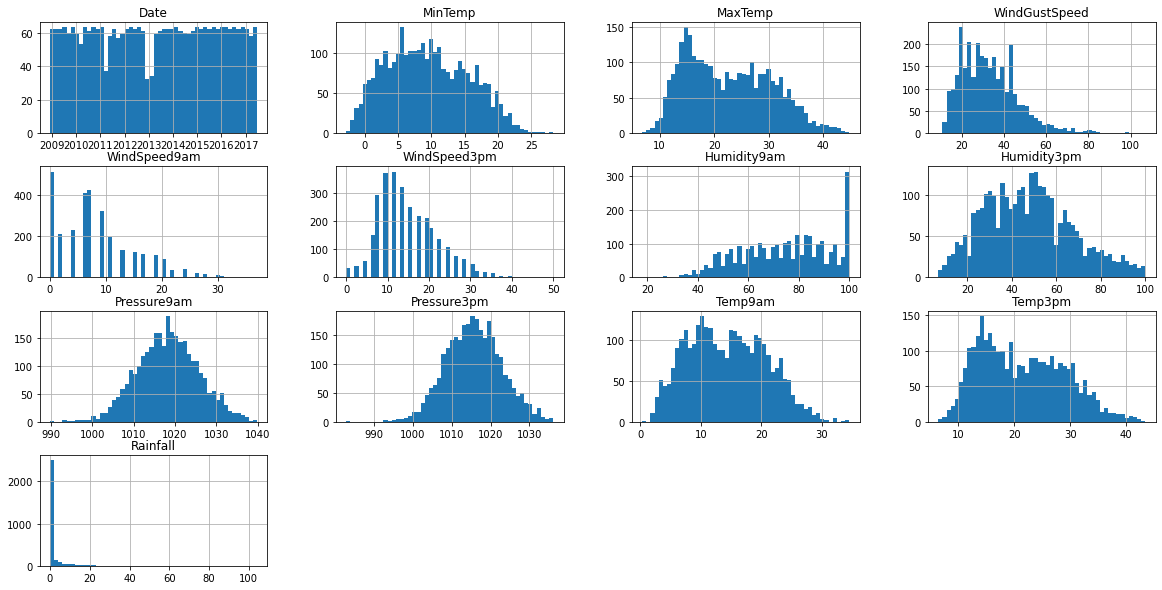

In [83]:
df_Albury.hist(bins=50, figsize=(20, 10))
plt.show()

Largest amount of rainfall was 104.2 




<AxesSubplot:xlabel='Date', ylabel='Rainfall'>

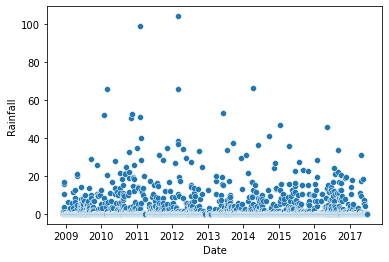

In [84]:
print('Largest amount of rainfall was',df_Albury['Rainfall'].max(),"\n\n")
#plt.figure(figsize=(15,10))
sns.scatterplot(x=df_Albury['Date'],y=df_Albury['Rainfall'])

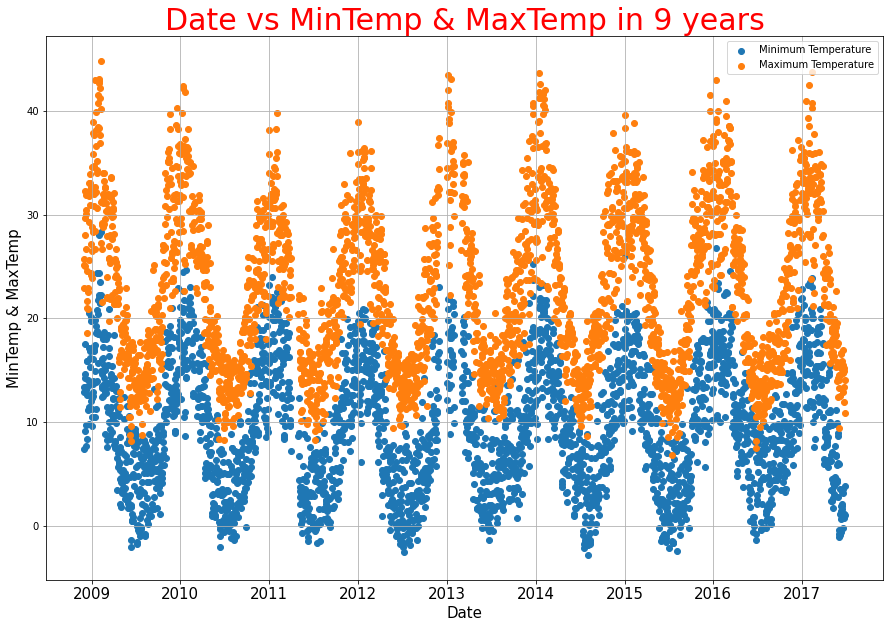

In [85]:
#plot Date &  vs MinTemp & MaxTemp in 9 year
plt.figure(figsize=(15,10))
plt.scatter(df_Albury['Date'],df_Albury['MinTemp'],label = 'Minimum Temperature')
plt.scatter(df_Albury['Date'],df_Albury['MaxTemp'], label = 'Maximum Temperature')
plt.title('Date vs MinTemp & MaxTemp in 9 years',fontsize=30,c='red')
plt.xlabel("Date",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("MinTemp & MaxTemp",fontsize=15)
plt.grid()
plt.legend(loc='upper right')
plt.show()

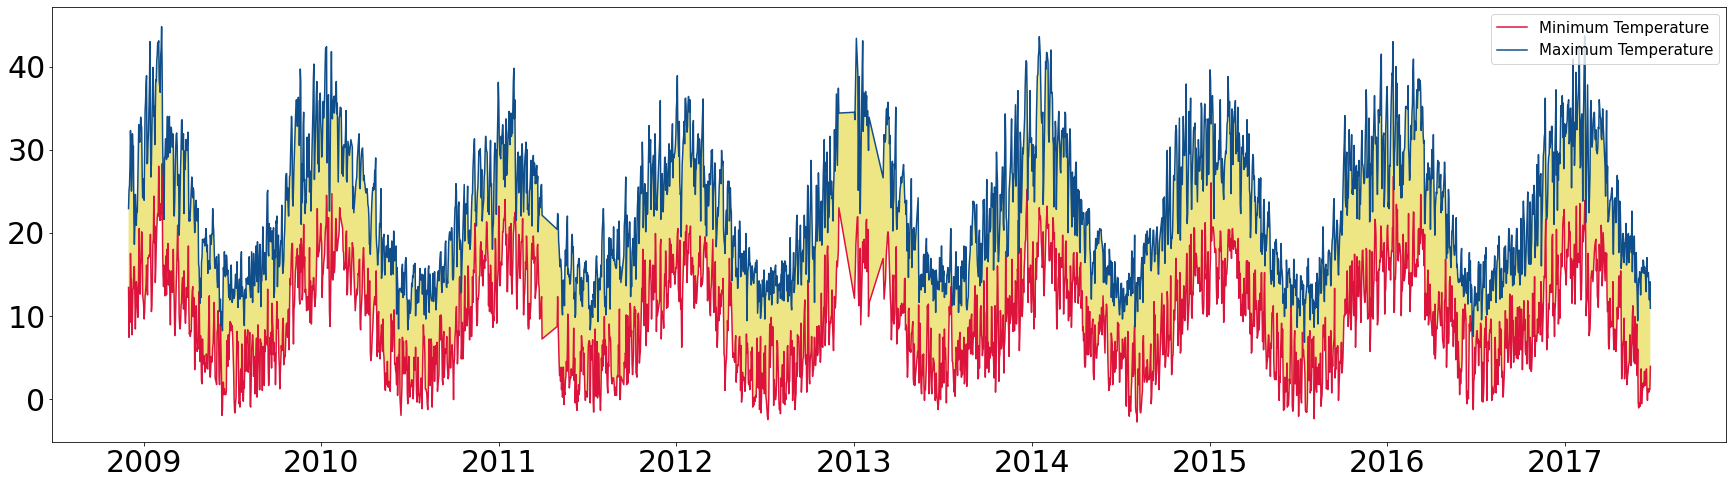

In [86]:
plt.figure(figsize = (30,8))
plt.plot(df_Albury['Date'], df_Albury['MinTemp'], color = "#DC143C", label = 'Minimum Temperature',)
plt.plot(df_Albury['Date'], df_Albury['MaxTemp'], color = "#104E8B", label = 'Maximum Temperature')
plt.fill_between(df_Albury['Date'], df_Albury['MinTemp'], df_Albury['MaxTemp'], facecolor = "#EEE685")
plt.xticks(fontsize=30)
plt.yticks(fontsize=30)
plt.legend(loc='upper right', prop={'size':15})
plt.show()

In [87]:
# finding minmum and maximum temperture
minimum_temperature = df_Albury['MinTemp'].min()
print("Minimum Temperature:",minimum_temperature,"Degrees Celsius")
maximum_temperature = df_Albury['MaxTemp'].max()
print("Maximum Temperature:",maximum_temperature,"Degrees Celsius")

Minimum Temperature: -2.8 Degrees Celsius
Maximum Temperature: 44.8 Degrees Celsius


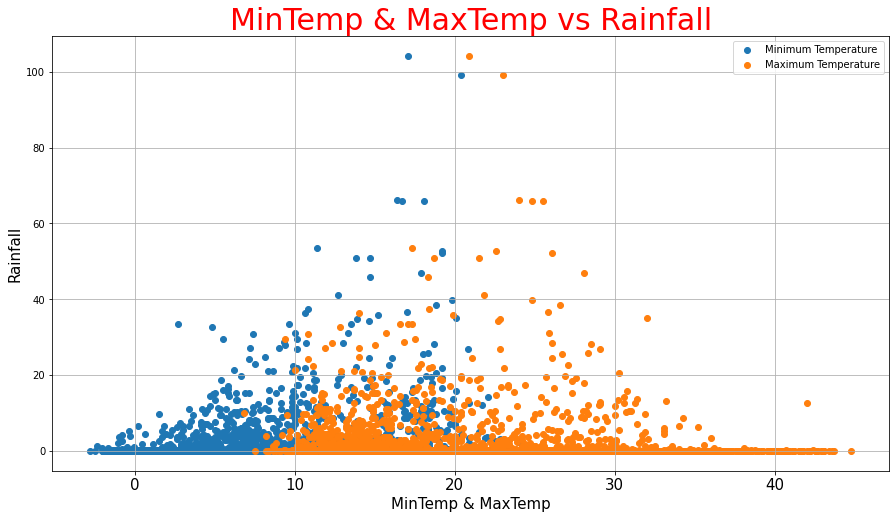

In [88]:
#plot MinTemp & MaxTemp vs Rainfall
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['MinTemp'],df_Albury['Rainfall'],label = 'Minimum Temperature')
plt.scatter(df_Albury['MaxTemp'],df_Albury['Rainfall'],label = 'Maximum Temperature')
plt.title('MinTemp & MaxTemp vs Rainfall',fontsize=30,c='red')
plt.xlabel("MinTemp & MaxTemp",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Rainfall",fontsize=15)
plt.legend(loc='upper right')
plt.grid()
plt.show()

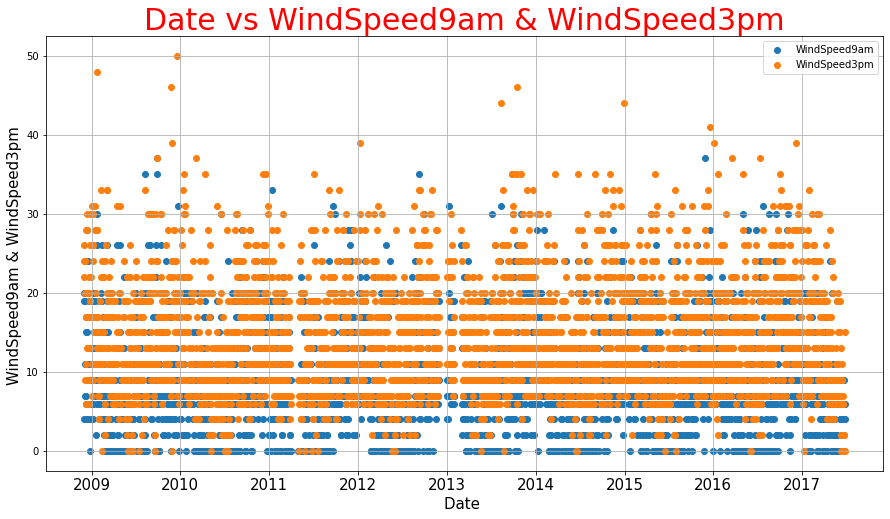

In [89]:
#plot Date &  vs WindSpeed9am & WindSpeed3pm in 9 year
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Date'],df_Albury['WindSpeed9am'],label = 'WindSpeed9am')
plt.scatter(df_Albury['Date'],df_Albury['WindSpeed3pm'],label = 'WindSpeed3pm')
plt.title('Date vs WindSpeed9am & WindSpeed3pm',fontsize=30,c='red')
plt.xlabel("Date ",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("WindSpeed9am & WindSpeed3pm ",fontsize=15)
plt.legend(loc='upper right')
plt.grid()
plt.show()

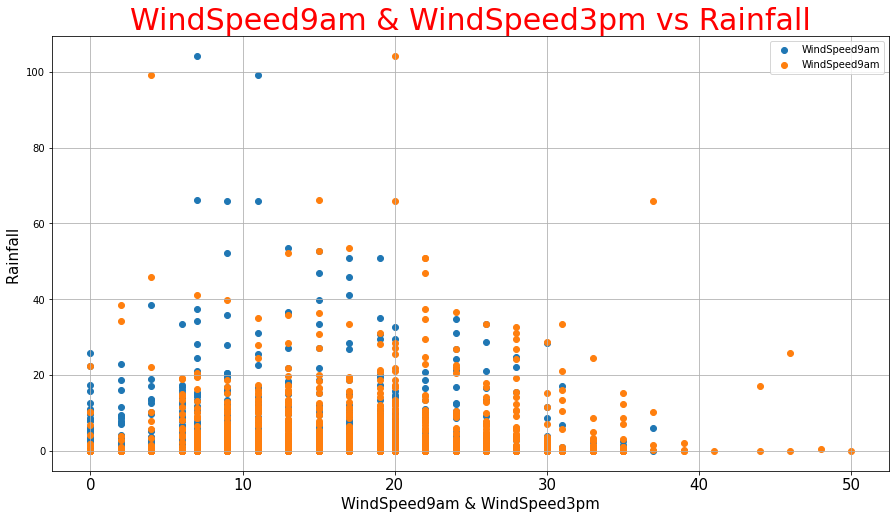

In [90]:
#plot WindSpeed9am & WindSpeed3pm  vs Rainfall
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['WindSpeed9am'],df_Albury['Rainfall'],label = 'WindSpeed9am')
plt.scatter(df_Albury['WindSpeed3pm'],df_Albury['Rainfall'],label = 'WindSpeed9am')
plt.title('WindSpeed9am & WindSpeed3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("WindSpeed9am & WindSpeed3pm",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Rainfall ",fontsize=15)
plt.legend(loc='upper right')
plt.grid()
plt.show()

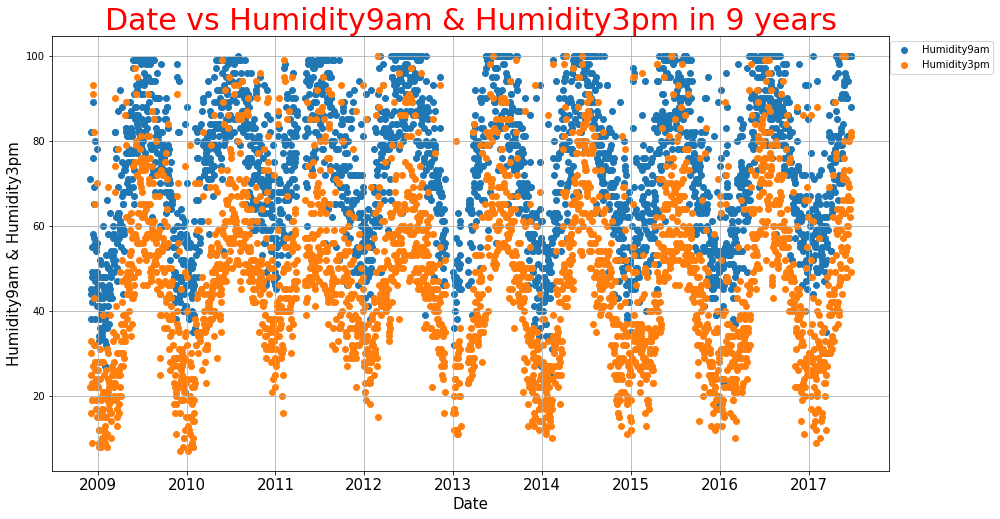

In [91]:
#plot Date &  vs Humidity9am & Humidity3pm' in 9 year
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Date'],df_Albury['Humidity9am'],label = 'Humidity9am')
plt.scatter(df_Albury['Date'],df_Albury['Humidity3pm'],label = 'Humidity3pm')
plt.title('Date vs Humidity9am & Humidity3pm in 9 years',fontsize=30,c='red')
plt.xlabel("Date",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Humidity9am & Humidity3pm",fontsize=15)
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

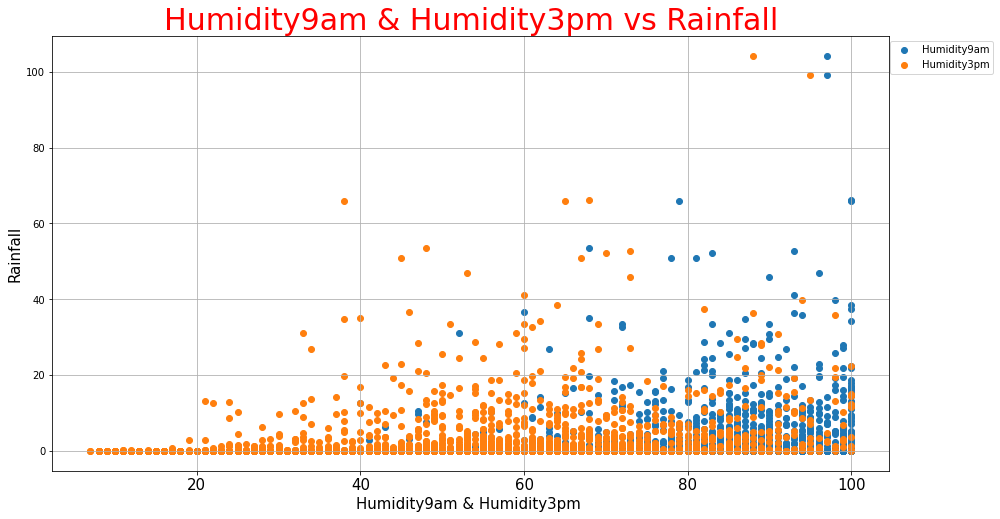

In [92]:
#plot Humidity9am & Humidity3pm' vs Rainfall
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Humidity9am'],df_Albury['Rainfall'],label = 'Humidity9am')
plt.scatter(df_Albury['Humidity3pm'],df_Albury['Rainfall'],label = 'Humidity3pm')
plt.title('Humidity9am & Humidity3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("Humidity9am & Humidity3pm ",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Rainfall",fontsize=15)
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

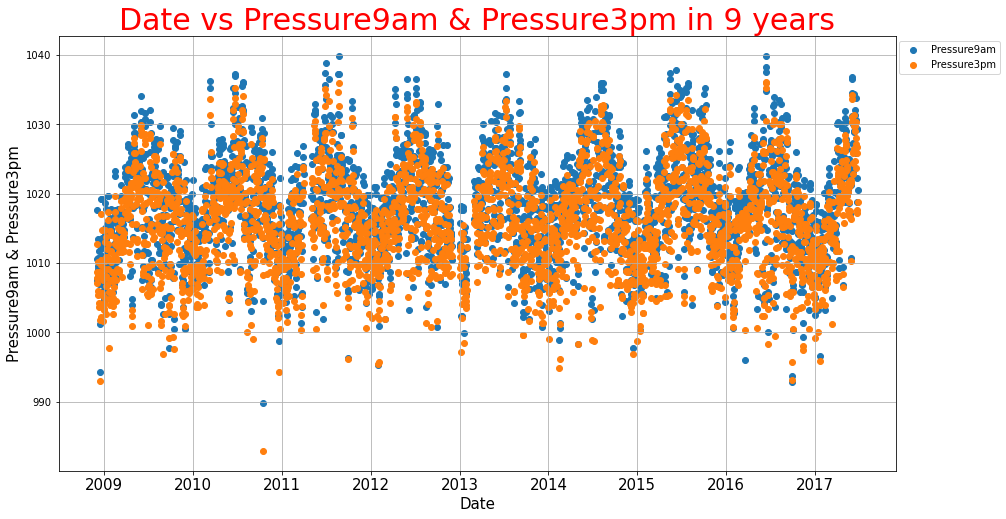

In [93]:
#plot Date &  vs Pressure9am & Pressure3pm in 9 year
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Date'],df_Albury['Pressure9am'],label = 'Pressure9am')
plt.scatter(df_Albury['Date'],df_Albury['Pressure3pm'],label = 'Pressure3pm')
plt.title('Date vs Pressure9am & Pressure3pm in 9 years',fontsize=30,c='red')
plt.xlabel("Date",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Pressure9am & Pressure3pm",fontsize=15)
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()

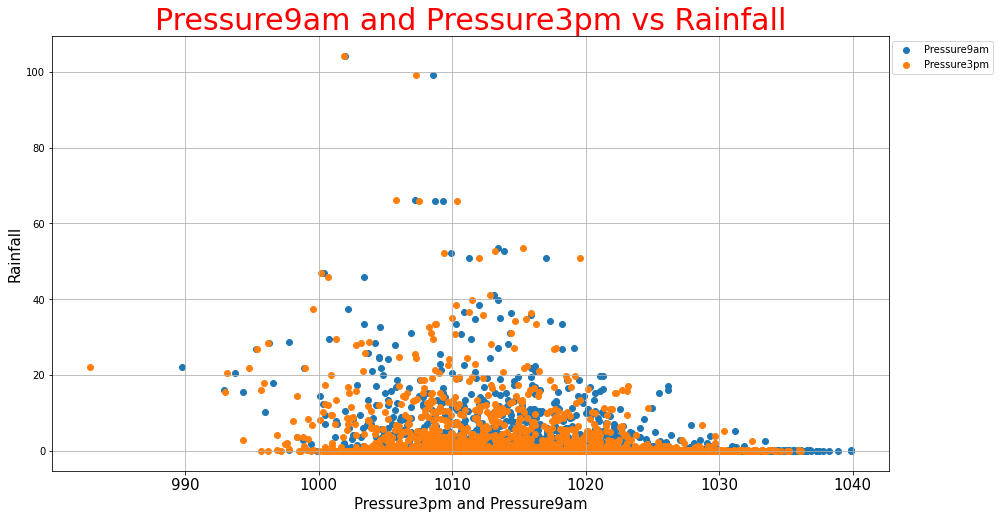

In [94]:
#plot Pressure3pm and Pressure9am vs Rainfall to find noise
plt.figure(figsize=(15,8))
plt.scatter(df_Albury['Pressure9am'],df_Albury['Rainfall'],label = 'Pressure9am')
plt.scatter(df_Albury['Pressure3pm'],df_Albury['Rainfall'],label = 'Pressure3pm')
plt.title('Pressure9am and Pressure3pm vs Rainfall',fontsize=30,c='red')
plt.xlabel("Pressure3pm and Pressure9am",fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel("Rainfall",fontsize=15)
plt.legend(prop={'size':10},bbox_to_anchor=(1.13,1))
plt.grid()
plt.show()


<AxesSubplot:title={'center':'Number of rows per year'}, xlabel='Date', ylabel='count'>

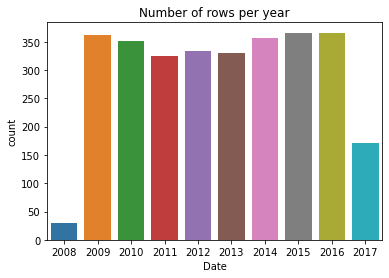

In [95]:
# میزان قرائت در هر سال
year=pd.to_datetime(df_Albury.Date).dt.year
plt.title('Number of rows per year')
sns.countplot(x=year)

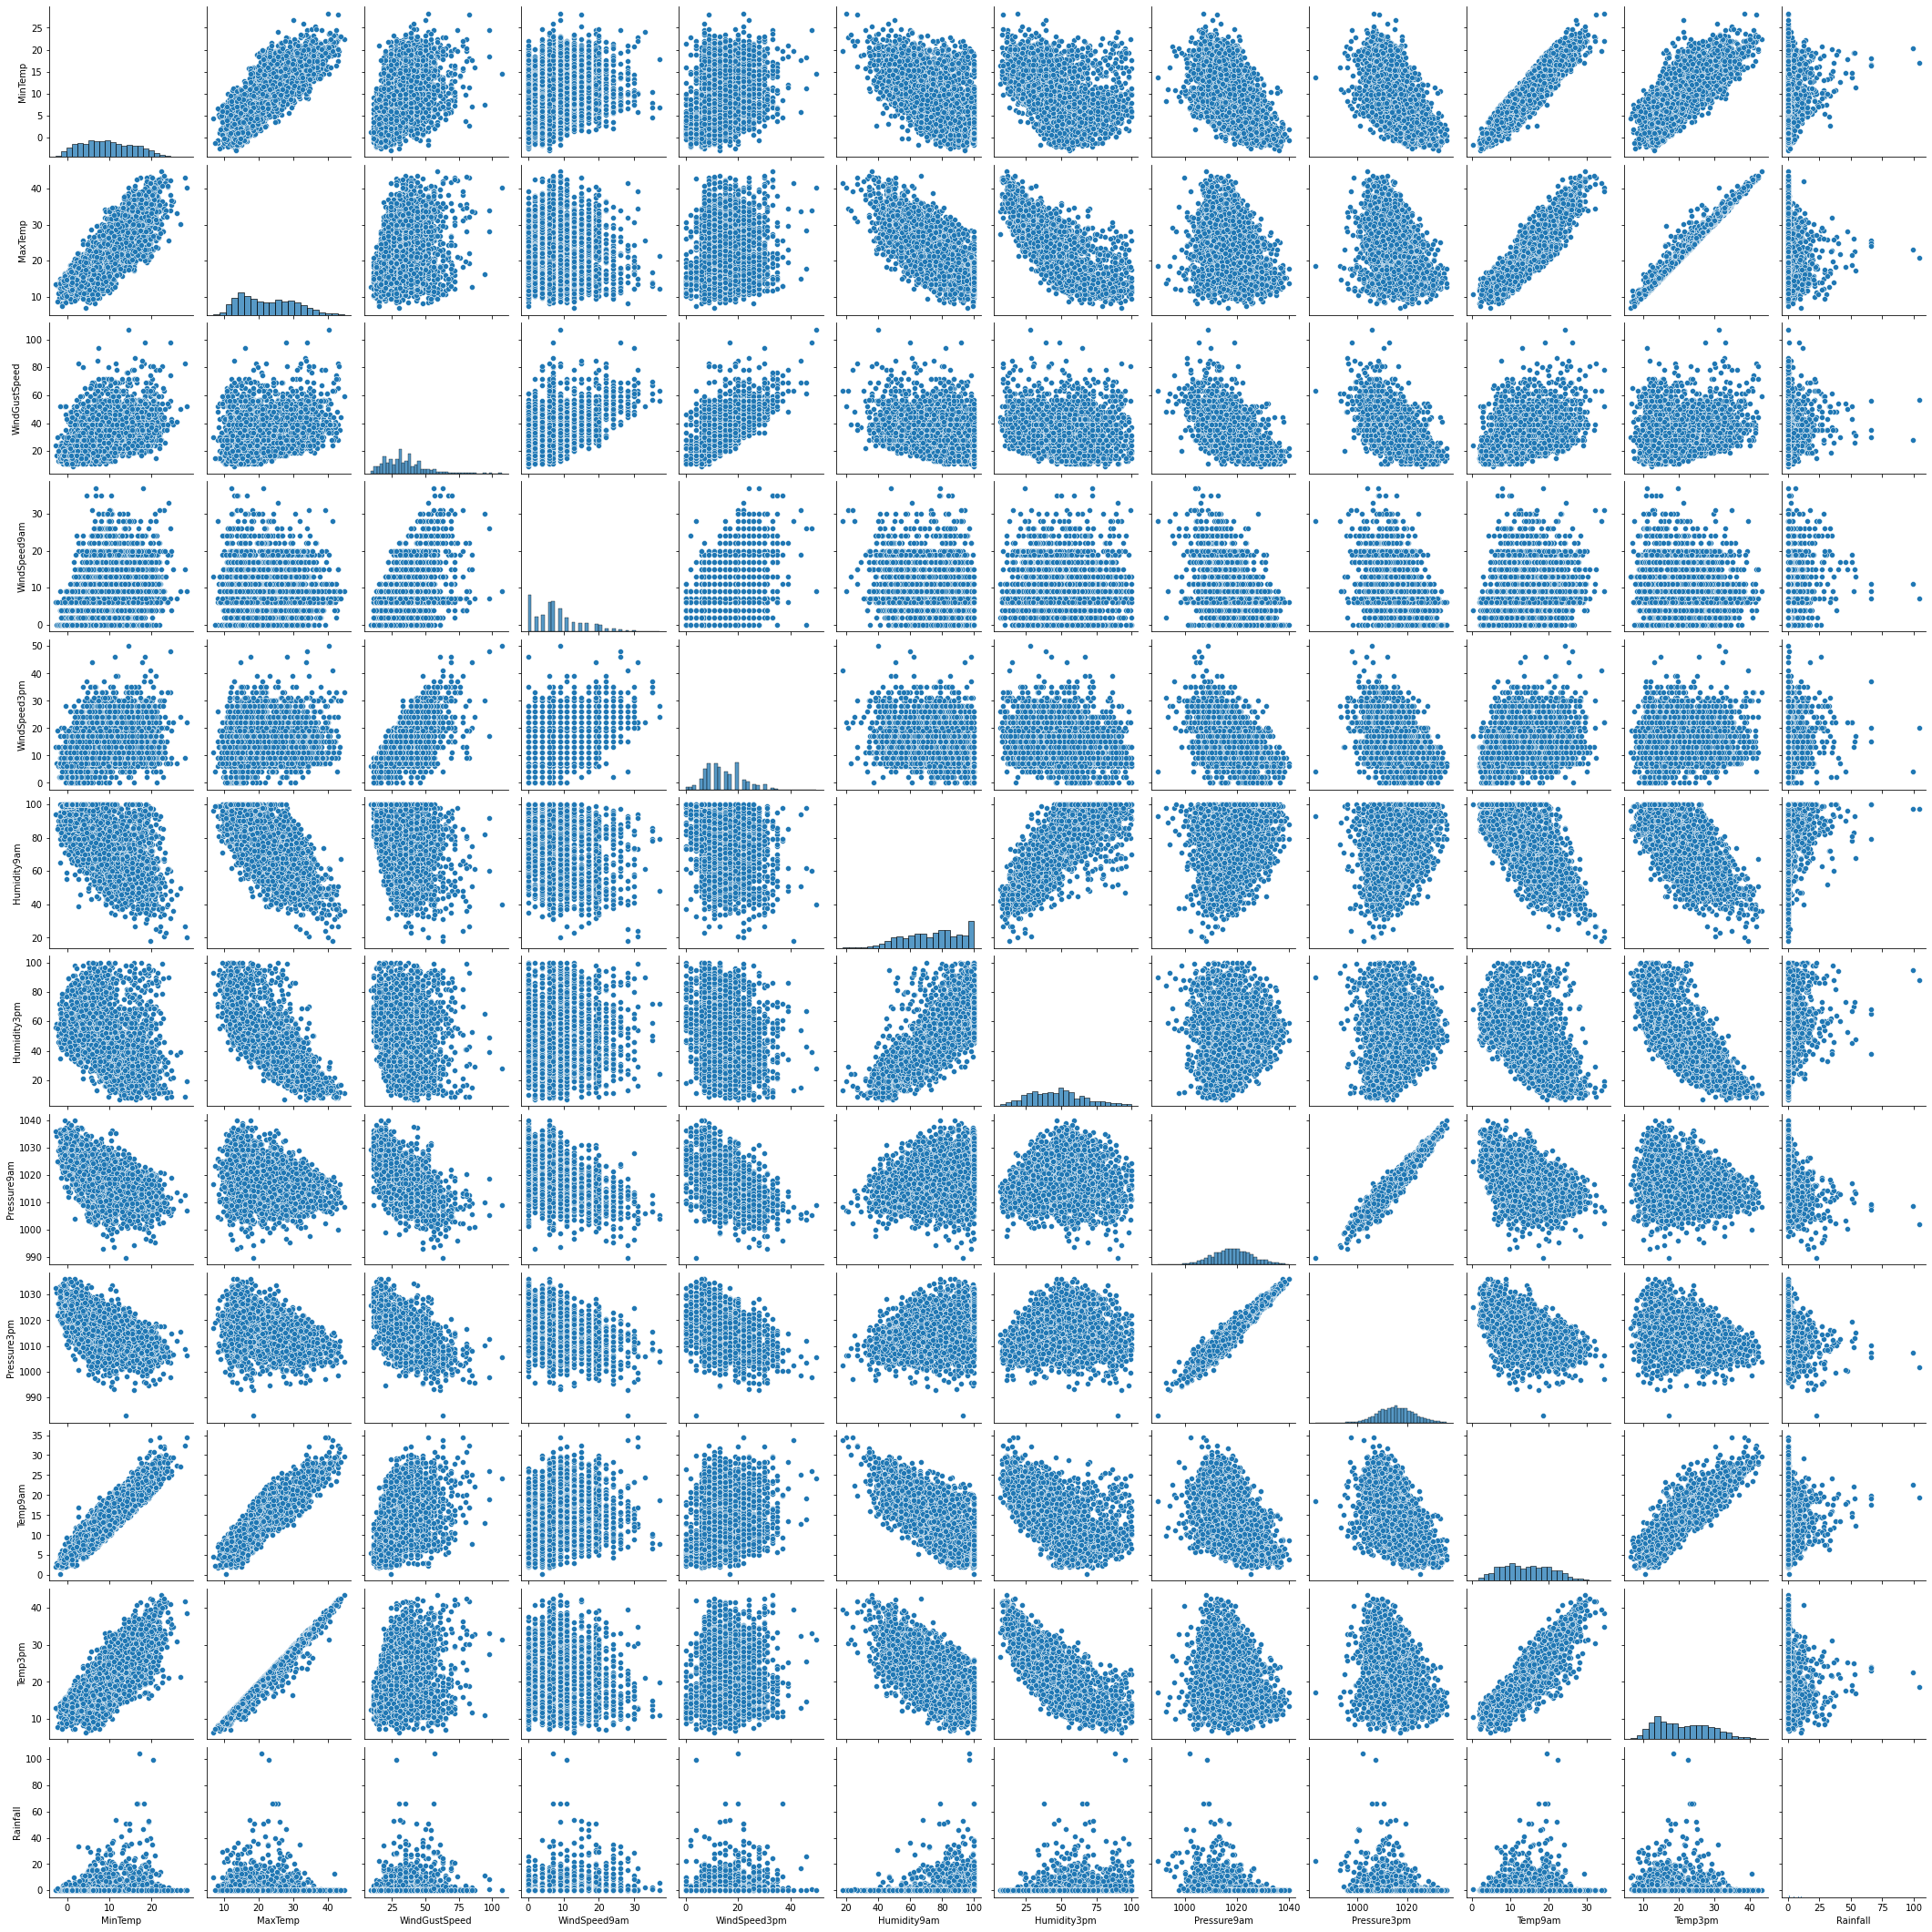

In [96]:
sns.pairplot(df_Albury)

In [97]:
df_Albury

Date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0    2008-12-01   Albury     13.4     22.9           44.0          20.0   
1    2008-12-02   Albury      7.4     25.1           44.0           4.0   
2    2008-12-03   Albury     12.9     25.7           46.0          19.0   
3    2008-12-04   Albury      9.2     28.0           24.0          11.0   
4    2008-12-05   Albury     17.5     32.3           41.0           7.0   
...         ...      ...      ...      ...            ...           ...   
3035 2017-06-21   Albury      1.2     15.2           15.0           0.0   
3036 2017-06-22   Albury      0.8     13.4           17.0           6.0   
3037 2017-06-23   Albury      1.1     11.9           44.0           9.0   
3038 2017-06-24   Albury      1.1     14.1           28.0           4.0   
3039 2017-06-25   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0  

[2990 rows x 14 columns]

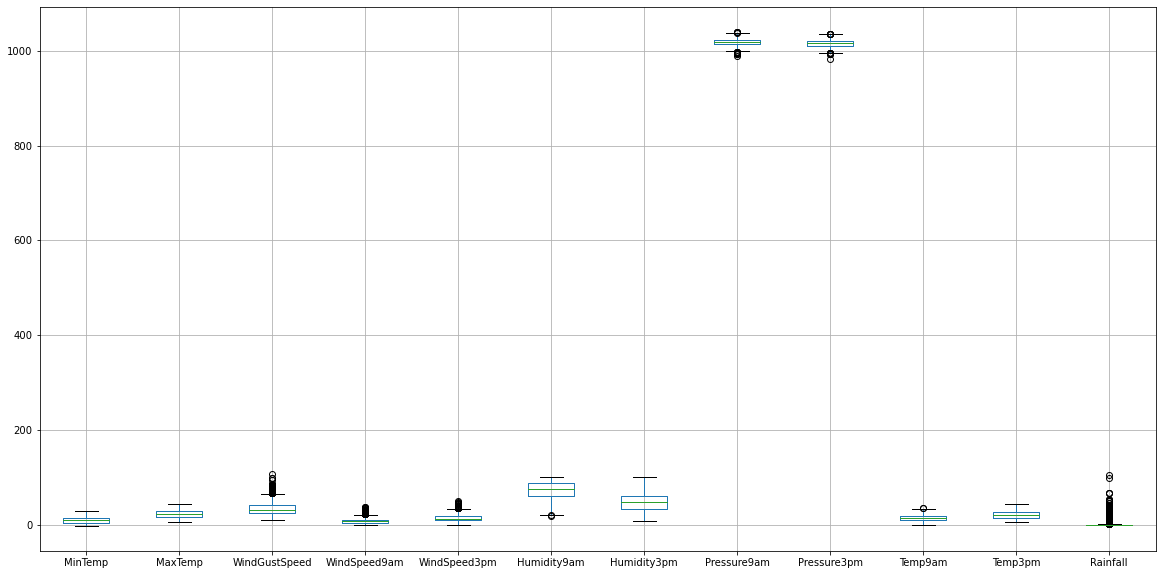

In [98]:
plt.figure(figsize=(20,10))
boxplot = df_Albury.boxplot(column = ['MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])


In [99]:
######################### making model (regression)############################

In [100]:
# handling date column
df_Albury.insert(1,"date",np.array(range(len(df_Albury['Date']))),True)
df_Albury1 = df_Albury # making a dataframe with Date

df_Albury

Date  date Location  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0    2008-12-01     0   Albury     13.4     22.9           44.0          20.0   
1    2008-12-02     1   Albury      7.4     25.1           44.0           4.0   
2    2008-12-03     2   Albury     12.9     25.7           46.0          19.0   
3    2008-12-04     3   Albury      9.2     28.0           24.0          11.0   
4    2008-12-05     4   Albury     17.5     32.3           41.0           7.0   
...         ...   ...      ...      ...      ...            ...           ...   
3035 2017-06-21  2985   Albury      1.2     15.2           15.0           0.0   
3036 2017-06-22  2986   Albury      0.8     13.4           17.0           6.0   
3037 2017-06-23  2987   Albury      1.1     11.9           44.0           9.0   
3038 2017-06-24  2988   Albury      1.1     14.1           28.0           4.0   
3039 2017-06-25  2989   Albury      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
3035           2.0        100.0         62.0       1029.4       1026.7   
3036           0.0        100.0         66.0       1029.4       1025.9   
3037           2.0        100.0         81.0       1022.3       1017.7   
3038          15.0        100.0         49.0       1018.8       1017.2   
3039           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
3035      2.9     14.3       0.4  
3036      3.6     13.3       0.0  
3037      2.7     10.2       0.0  
3038      3.9     13.1       0.2  
3039      6.4      8.8       0.0  

[2990 rows x 15 columns]

In [101]:
df_Albury.drop(['Date','Location'],axis = 1,inplace=True)
df_Albury

C:\Users\farjamnia\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


date  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0        0     13.4     22.9           44.0          20.0          24.0   
1        1      7.4     25.1           44.0           4.0          22.0   
2        2     12.9     25.7           46.0          19.0          26.0   
3        3      9.2     28.0           24.0          11.0           9.0   
4        4     17.5     32.3           41.0           7.0          20.0   
...    ...      ...      ...            ...           ...           ...   
3035  2985      1.2     15.2           15.0           0.0           2.0   
3036  2986      0.8     13.4           17.0           6.0           0.0   
3037  2987      1.1     11.9           44.0           9.0           2.0   
3038  2988      1.1     14.1           28.0           4.0          15.0   
3039  2989      3.9     10.9           28.0           6.0           0.0   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  Temp9am  Temp3pm  \
0            71.0         22.0       1007.7       1007.1     16.9     21.8   
1            44.0         25.0       1010.6       1007.8     17.2     24.3   
2            38.0         30.0       1007.6       1008.7     21.0     23.2   
3            45.0         16.0       1017.6       1012.8     18.1     26.5   
4            82.0         33.0       1010.8       1006.0     17.8     29.7   
...           ...          ...          ...          ...      ...      ...   
3035        100.0         62.0       1029.4       1026.7      2.9     14.3   
3036        100.0         66.0       1029.4       1025.9      3.6     13.3   
3037        100.0         81.0       1022.3       1017.7      2.7     10.2   
3038        100.0         49.0       1018.8       1017.2      3.9     13.1   
3039         88.0         82.0       1020.5       1018.8      6.4      8.8   

      Rainfall  
0          0.6  
1          0.0  
2          0.0  
3          0.0  
4          1.0  
...        ...  
3035       0.4  
3036       0.0  
3037       0.0  
3038       0.2  
3039       0.0  

[2990 rows x 13 columns]

In [102]:
df_Albury.describe()

date      MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  \
count  2990.000000  2990.000000  2990.000000    2990.000000   2990.000000   
mean   1494.500000     9.509465    22.635318      32.981522      8.193980   
std     863.282978     6.067467     7.814568      13.378650      6.742392   
min       0.000000    -2.800000     6.800000       9.000000      0.000000   
25%     747.250000     4.700000    15.800000      24.000000      4.000000   
50%    1494.500000     9.100000    21.900000      31.000000      7.000000   
75%    2241.750000    14.300000    28.900000      41.000000     11.000000   
max    2989.000000    28.300000    44.800000     107.000000     37.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   2990.000000  2990.000000  2990.000000  2990.000000  2990.000000   
mean      14.393980    74.083946    47.822742  1018.363545  1015.747759   
std        7.222921    17.434712    19.789728     7.366357     7.119792   
min        0.000000    18.000000     7.000000   989.800000   982.900000   
25%        9.000000    61.000000    33.000000  1013.400000  1010.700000   
50%       13.000000    76.000000    47.000000  1018.400000  1015.600000   
75%       19.000000    88.000000    60.000000  1023.300000  1020.500000   
max       50.000000   100.000000   100.000000  1039.900000  1036.100000   

           Temp9am      Temp3pm     Rainfall  
count  2990.000000  2990.000000  2990.000000  
mean     14.343445    21.369097     1.892843  
std       6.381408     7.539110     6.184092  
min       0.300000     6.400000     0.000000  
25%       9.200000    14.900000     0.000000  
50%      14.100000    20.600000     0.000000  
75%      19.300000    27.200000     0.400000  
max      34.500000    43.400000   104.200000

# normalize

In [103]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
norm1 = scaler.fit_transform(df_Albury)
norm1_df_Albury = pd.DataFrame(norm1,columns = ['date','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Rainfall'])
norm1_df_Albury


date   MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.000000  0.520900  0.423684       0.357143      0.540541          0.48   
1     0.000335  0.327974  0.481579       0.357143      0.108108          0.44   
2     0.000669  0.504823  0.497368       0.377551      0.513514          0.52   
3     0.001004  0.385852  0.557895       0.153061      0.297297          0.18   
4     0.001338  0.652733  0.671053       0.326531      0.189189          0.40   
...        ...       ...       ...            ...           ...           ...   
2985  0.998662  0.128617  0.221053       0.061224      0.000000          0.04   
2986  0.998996  0.115756  0.173684       0.081633      0.162162          0.00   
2987  0.999331  0.125402  0.134211       0.357143      0.243243          0.04   
2988  0.999665  0.125402  0.192105       0.193878      0.108108          0.30   
2989  1.000000  0.215434  0.107895       0.193878      0.162162          0.00   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0        0.646341     0.161290     0.357285     0.454887  0.485380  0.416216   
1        0.317073     0.193548     0.415170     0.468045  0.494152  0.483784   
2        0.243902     0.247312     0.355289     0.484962  0.605263  0.454054   
3        0.329268     0.096774     0.554890     0.562030  0.520468  0.543243   
4        0.780488     0.279570     0.419162     0.434211  0.511696  0.629730   
...           ...          ...          ...          ...       ...       ...   
2985     1.000000     0.591398     0.790419     0.823308  0.076023  0.213514   
2986     1.000000     0.634409     0.790419     0.808271  0.096491  0.186486   
2987     1.000000     0.795699     0.648703     0.654135  0.070175  0.102703   
2988     1.000000     0.451613     0.578842     0.644737  0.105263  0.181081   
2989     0.853659     0.806452     0.612774     0.674812  0.178363  0.064865   

      Rainfall  
0     0.005758  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.009597  
...        ...  
2985  0.003839  
2986  0.000000  
2987  0.000000  
2988  0.001919  
2989  0.000000  

[2990 rows x 13 columns]

In [104]:
df_Albury.describe()

date      MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  \
count  2990.000000  2990.000000  2990.000000    2990.000000   2990.000000   
mean   1494.500000     9.509465    22.635318      32.981522      8.193980   
std     863.282978     6.067467     7.814568      13.378650      6.742392   
min       0.000000    -2.800000     6.800000       9.000000      0.000000   
25%     747.250000     4.700000    15.800000      24.000000      4.000000   
50%    1494.500000     9.100000    21.900000      31.000000      7.000000   
75%    2241.750000    14.300000    28.900000      41.000000     11.000000   
max    2989.000000    28.300000    44.800000     107.000000     37.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   2990.000000  2990.000000  2990.000000  2990.000000  2990.000000   
mean      14.393980    74.083946    47.822742  1018.363545  1015.747759   
std        7.222921    17.434712    19.789728     7.366357     7.119792   
min        0.000000    18.000000     7.000000   989.800000   982.900000   
25%        9.000000    61.000000    33.000000  1013.400000  1010.700000   
50%       13.000000    76.000000    47.000000  1018.400000  1015.600000   
75%       19.000000    88.000000    60.000000  1023.300000  1020.500000   
max       50.000000   100.000000   100.000000  1039.900000  1036.100000   

           Temp9am      Temp3pm     Rainfall  
count  2990.000000  2990.000000  2990.000000  
mean     14.343445    21.369097     1.892843  
std       6.381408     7.539110     6.184092  
min       0.300000     6.400000     0.000000  
25%       9.200000    14.900000     0.000000  
50%      14.100000    20.600000     0.000000  
75%      19.300000    27.200000     0.400000  
max      34.500000    43.400000   104.200000

In [105]:
#number of missing values in each column of initial data
norm1_df_Albury.isnull().sum()

date             0
MinTemp          0
MaxTemp          0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Temp9am          0
Temp3pm          0
Rainfall         0
dtype: int64

In [106]:
df1=norm1_df_Albury
df1

date   MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.000000  0.520900  0.423684       0.357143      0.540541          0.48   
1     0.000335  0.327974  0.481579       0.357143      0.108108          0.44   
2     0.000669  0.504823  0.497368       0.377551      0.513514          0.52   
3     0.001004  0.385852  0.557895       0.153061      0.297297          0.18   
4     0.001338  0.652733  0.671053       0.326531      0.189189          0.40   
...        ...       ...       ...            ...           ...           ...   
2985  0.998662  0.128617  0.221053       0.061224      0.000000          0.04   
2986  0.998996  0.115756  0.173684       0.081633      0.162162          0.00   
2987  0.999331  0.125402  0.134211       0.357143      0.243243          0.04   
2988  0.999665  0.125402  0.192105       0.193878      0.108108          0.30   
2989  1.000000  0.215434  0.107895       0.193878      0.162162          0.00   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0        0.646341     0.161290     0.357285     0.454887  0.485380  0.416216   
1        0.317073     0.193548     0.415170     0.468045  0.494152  0.483784   
2        0.243902     0.247312     0.355289     0.484962  0.605263  0.454054   
3        0.329268     0.096774     0.554890     0.562030  0.520468  0.543243   
4        0.780488     0.279570     0.419162     0.434211  0.511696  0.629730   
...           ...          ...          ...          ...       ...       ...   
2985     1.000000     0.591398     0.790419     0.823308  0.076023  0.213514   
2986     1.000000     0.634409     0.790419     0.808271  0.096491  0.186486   
2987     1.000000     0.795699     0.648703     0.654135  0.070175  0.102703   
2988     1.000000     0.451613     0.578842     0.644737  0.105263  0.181081   
2989     0.853659     0.806452     0.612774     0.674812  0.178363  0.064865   

      Rainfall  
0     0.005758  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.009597  
...        ...  
2985  0.003839  
2986  0.000000  
2987  0.000000  
2988  0.001919  
2989  0.000000  

[2990 rows x 13 columns]

In [107]:
# Dividing the training data set into x and y
#x = df_Albury[['date','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm']]
y = df1.pop('Rainfall')
x = df1
x


date   MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.000000  0.520900  0.423684       0.357143      0.540541          0.48   
1     0.000335  0.327974  0.481579       0.357143      0.108108          0.44   
2     0.000669  0.504823  0.497368       0.377551      0.513514          0.52   
3     0.001004  0.385852  0.557895       0.153061      0.297297          0.18   
4     0.001338  0.652733  0.671053       0.326531      0.189189          0.40   
...        ...       ...       ...            ...           ...           ...   
2985  0.998662  0.128617  0.221053       0.061224      0.000000          0.04   
2986  0.998996  0.115756  0.173684       0.081633      0.162162          0.00   
2987  0.999331  0.125402  0.134211       0.357143      0.243243          0.04   
2988  0.999665  0.125402  0.192105       0.193878      0.108108          0.30   
2989  1.000000  0.215434  0.107895       0.193878      0.162162          0.00   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0        0.646341     0.161290     0.357285     0.454887  0.485380  0.416216  
1        0.317073     0.193548     0.415170     0.468045  0.494152  0.483784  
2        0.243902     0.247312     0.355289     0.484962  0.605263  0.454054  
3        0.329268     0.096774     0.554890     0.562030  0.520468  0.543243  
4        0.780488     0.279570     0.419162     0.434211  0.511696  0.629730  
...           ...          ...          ...          ...       ...       ...  
2985     1.000000     0.591398     0.790419     0.823308  0.076023  0.213514  
2986     1.000000     0.634409     0.790419     0.808271  0.096491  0.186486  
2987     1.000000     0.795699     0.648703     0.654135  0.070175  0.102703  
2988     1.000000     0.451613     0.578842     0.644737  0.105263  0.181081  
2989     0.853659     0.806452     0.612774     0.674812  0.178363  0.064865  

[2990 rows x 12 columns]

In [108]:
y

0       0.005758
1       0.000000
2       0.000000
3       0.000000
4       0.009597
          ...   
2985    0.003839
2986    0.000000
2987    0.000000
2988    0.001919
2989    0.000000
Name: Rainfall, Length: 2990, dtype: float64

# building linear model

In [109]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)

LinearRegression()

In [110]:
y_pred = regressor.predict(x_test)

## plot Feature importances via coefficients

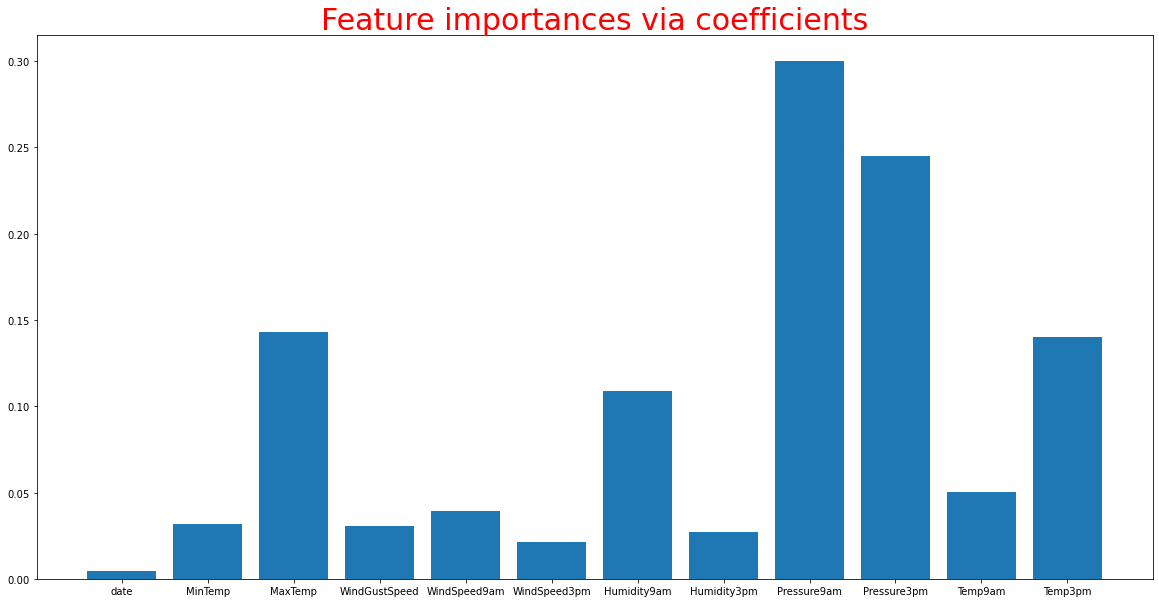

In [111]:
from sklearn.linear_model import LassoCV

lasso = LassoCV().fit(x, y)
importance = np.abs(lasso.coef_)
feature_names = np.array(df1.columns)
plt.figure(figsize=(20,10))
plt.bar(height=importance, x=feature_names)
plt.title("Feature importances via coefficients",fontsize=30,c='red')
plt.show()

## Selecting features based on importance¶

In [194]:
#Now we want to select the two features which are the most important according to the coefficients. 
#The SelectFromModel is meant just for that
#SelectFromModel accepts a threshold parameter and will select the features whose importance (defined by the coefficients) are above this threshold.
#Since we want to select only 5 features, we will set this threshold slightly above the coefficient of third most important feature.
from sklearn.feature_selection import SelectFromModel

threshold = np.sort(importance)[-6] + 0.01

sfm = SelectFromModel(lasso, threshold=threshold).fit(x, y)
print(f"Features selected by SelectFromModel: {feature_names[sfm.get_support()]}")


Features selected by SelectFromModel: ['MaxTemp' 'Humidity9am' 'Pressure9am' 'Pressure3pm' 'Temp3pm']


In [195]:
from sklearn.feature_selection import SelectKBest, mutual_info_regression
#Select top 5 features based on mutual info regression
selector = SelectKBest(mutual_info_regression, k =5)
selector.fit(x, y)
x.columns[selector.get_support()]

Index(['date', 'MaxTemp', 'Humidity9am', 'Humidity3pm', 'Temp3pm'], dtype='object')

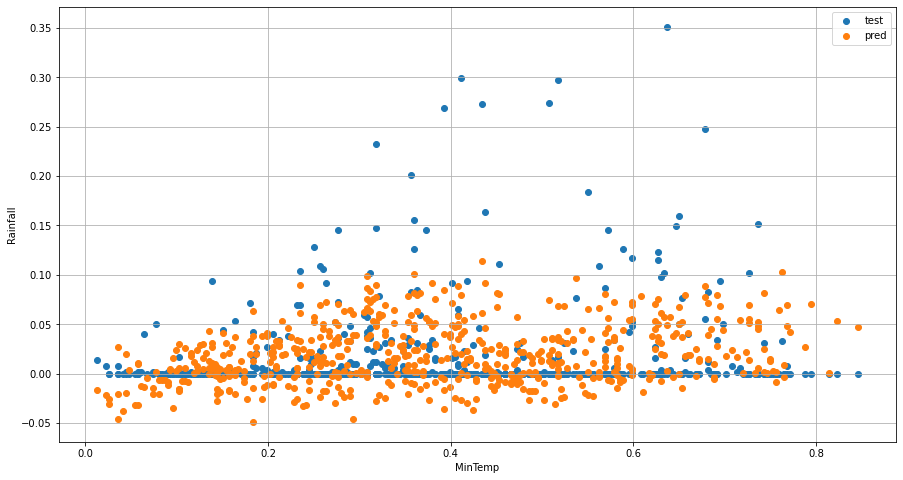

In [196]:
a = x_test.MinTemp
b = y_test
c = x_test.MinTemp
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("MinTemp")
plt.ylabel("Rainfall")
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(loc='upper right')
plt.grid()
plt.show()

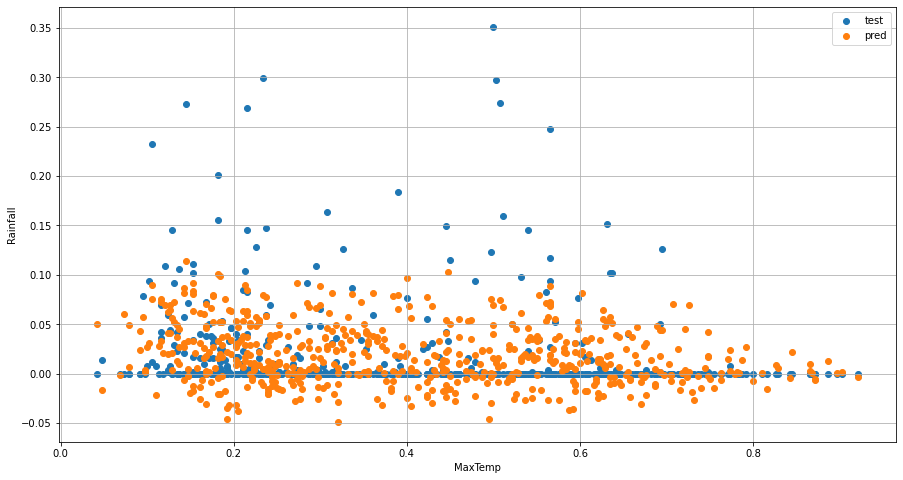

In [197]:
a = x_test.MaxTemp
b = y_test
c = x_test.MaxTemp
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("MaxTemp")
plt.ylabel("Rainfall")
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(loc='upper right')
plt.grid()
plt.show()


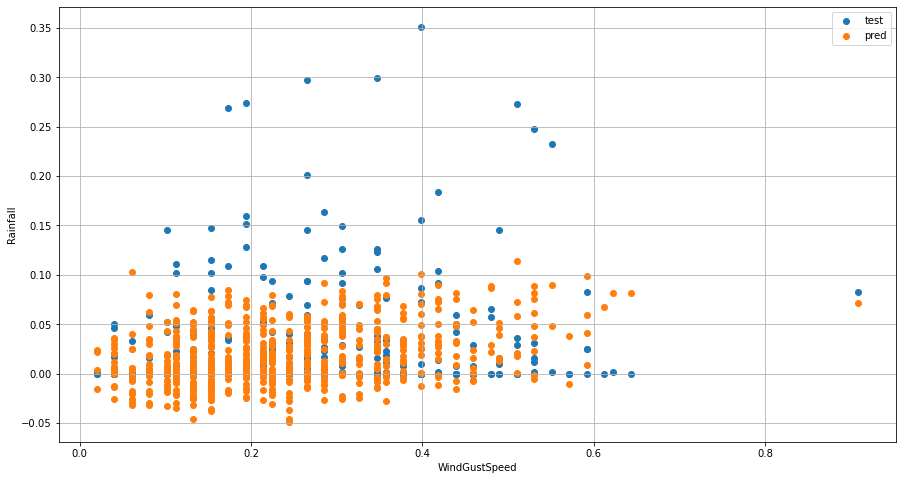

In [198]:
a = x_test.WindGustSpeed
b = y_test
c = x_test.WindGustSpeed
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("WindGustSpeed")
plt.ylabel("Rainfall")
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(loc='upper right')
plt.grid()
plt.show()

#                                            Intercept & coef

In [199]:
# Intercept & coef
# 'date','MinTemp','MaxTemp','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm'
print(regressor.intercept_)
print(regressor.coef_)


-0.09829469193472185
[-0.00856422  0.02294949 -0.17853061  0.03481699  0.0462553  -0.02607165
  0.11724032  0.03429109 -0.3199864   0.26345216  0.06069576  0.18536607]


# compare y_pred and y_test

Text(0, 0.5, 'prediction')

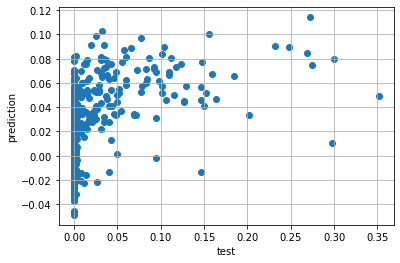

In [200]:
#plot to compare y_pred and y_test
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("test")
plt.ylabel("prediction")

In [201]:
compare = pd.DataFrame({'Actual':y_test , 'Predict':y_pred})
compare.reset_index()

index    Actual   Predict
0     2572  0.000000  0.000189
1     1230  0.000000 -0.020993
2      316  0.000000  0.025241
3     2752  0.000000  0.013190
4     2189  0.000000 -0.005063
..     ...       ...       ...
593   2210  0.000000  0.013159
594    476  0.030710  0.068412
595   1610  0.001919  0.032877
596   1675  0.000000 -0.045557
597   2113  0.000000  0.006601

[598 rows x 3 columns]

# calculate error

In [202]:
def error(a):
    x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=a ,random_state = 0)
    regressor = LinearRegression()
    regressor.fit(x_train , y_train)
    y_pred = regressor.predict(x_test)
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_test , y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_test , y_pred))
    print('Root Mean Squared Error:',np.sqrt(metrics.mean_squared_error(y_test , y_pred)))
    print('R2 score:',metrics.r2_score(y_test , y_pred))    

In [203]:
# test_size=0.1
error(0.1)

Mean Absolute Error: 0.02498059767625583
Mean Squared Error: 0.0015748549838656477
Root Mean Squared Error: 0.03968444259235157
R2 score: 0.26864044571318


In [204]:
# test_size=0.2
error(0.2)

Mean Absolute Error: 0.02489239310219379
Mean Squared Error: 0.0015584225180873825
Root Mean Squared Error: 0.03947686053990847
R2 score: 0.19457464009197345


In [205]:
# test_size=0.3
error(0.3)

Mean Absolute Error: 0.026753457814875654
Mean Squared Error: 0.0031671900903483315
Root Mean Squared Error: 0.05627779393640383
R2 score: 0.2152231589307243


In [206]:
#R2score shows  train=90% is better than train=80%   norm1_df_Albury

## finding more important features and give them more dimention

In [207]:

df1.insert(12,'Rainfall',y)
df1

date   MinTemp   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  \
0     0.000000  0.520900  0.423684       0.357143      0.540541          0.48   
1     0.000335  0.327974  0.481579       0.357143      0.108108          0.44   
2     0.000669  0.504823  0.497368       0.377551      0.513514          0.52   
3     0.001004  0.385852  0.557895       0.153061      0.297297          0.18   
4     0.001338  0.652733  0.671053       0.326531      0.189189          0.40   
...        ...       ...       ...            ...           ...           ...   
2985  0.998662  0.128617  0.221053       0.061224      0.000000          0.04   
2986  0.998996  0.115756  0.173684       0.081633      0.162162          0.00   
2987  0.999331  0.125402  0.134211       0.357143      0.243243          0.04   
2988  0.999665  0.125402  0.192105       0.193878      0.108108          0.30   
2989  1.000000  0.215434  0.107895       0.193878      0.162162          0.00   

      Humidity9am  Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  \
0        0.646341     0.161290     0.357285     0.454887  0.485380  0.416216   
1        0.317073     0.193548     0.415170     0.468045  0.494152  0.483784   
2        0.243902     0.247312     0.355289     0.484962  0.605263  0.454054   
3        0.329268     0.096774     0.554890     0.562030  0.520468  0.543243   
4        0.780488     0.279570     0.419162     0.434211  0.511696  0.629730   
...           ...          ...          ...          ...       ...       ...   
2985     1.000000     0.591398     0.790419     0.823308  0.076023  0.213514   
2986     1.000000     0.634409     0.790419     0.808271  0.096491  0.186486   
2987     1.000000     0.795699     0.648703     0.654135  0.070175  0.102703   
2988     1.000000     0.451613     0.578842     0.644737  0.105263  0.181081   
2989     0.853659     0.806452     0.612774     0.674812  0.178363  0.064865   

      Rainfall  
0     0.005758  
1     0.000000  
2     0.000000  
3     0.000000  
4     0.009597  
...        ...  
2985  0.003839  
2986  0.000000  
2987  0.000000  
2988  0.001919  
2989  0.000000  

[2990 rows x 13 columns]

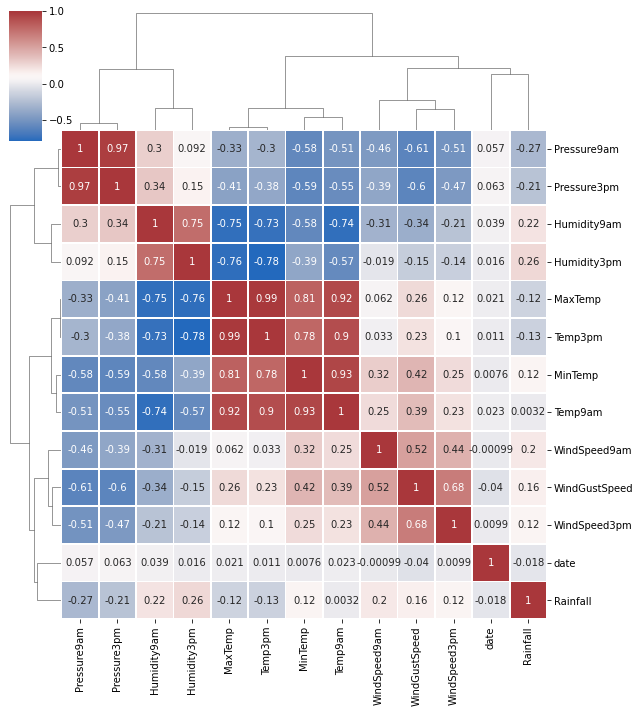

In [208]:
# correlation
sns.clustermap(df1.corr(), cmap = "vlag", dendrogram_ratio = (0.1, 0.2),annot = True, linewidths = .8, figsize = (9,10))
plt.show()

## ranking importance of features 
1- Pressure9am    
2- Humidity3pm 	   
3- Humidity9am     
4- Pressure3pm
5- WindSpeed9am
6- WindGustSpeed   
7- Temp3pm        
8- MaxTemp & windspeed3pm
9- date
10-Temp9a


# raise the dimention of Pressure9am

In [209]:
# define a function for add column in power 2 and normalize
def pow2(col):
    j = col+"2"
    n = df_Albury1[col]**2
    df1.insert(1, j, n)
    df1[[j]] = scaler.fit_transform(df1[[j]])
    x = df1

In [210]:
df_Albury1 = df_Albury1.reset_index()
df_Albury1

index  date  MinTemp  MaxTemp  WindGustSpeed  WindSpeed9am  \
0         0     0     13.4     22.9           44.0          20.0   
1         1     1      7.4     25.1           44.0           4.0   
2         2     2     12.9     25.7           46.0          19.0   
3         3     3      9.2     28.0           24.0          11.0   
4         4     4     17.5     32.3           41.0           7.0   
...     ...   ...      ...      ...            ...           ...   
2985   3035  2985      1.2     15.2           15.0           0.0   
2986   3036  2986      0.8     13.4           17.0           6.0   
2987   3037  2987      1.1     11.9           44.0           9.0   
2988   3038  2988      1.1     14.1           28.0           4.0   
2989   3039  2989      3.9     10.9           28.0           6.0   

      WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
0             24.0         71.0         22.0       1007.7       1007.1   
1             22.0         44.0         25.0       1010.6       1007.8   
2             26.0         38.0         30.0       1007.6       1008.7   
3              9.0         45.0         16.0       1017.6       1012.8   
4             20.0         82.0         33.0       1010.8       1006.0   
...            ...          ...          ...          ...          ...   
2985           2.0        100.0         62.0       1029.4       1026.7   
2986           0.0        100.0         66.0       1029.4       1025.9   
2987           2.0        100.0         81.0       1022.3       1017.7   
2988          15.0        100.0         49.0       1018.8       1017.2   
2989           0.0         88.0         82.0       1020.5       1018.8   

      Temp9am  Temp3pm  Rainfall  
0        16.9     21.8       0.6  
1        17.2     24.3       0.0  
2        21.0     23.2       0.0  
3        18.1     26.5       0.0  
4        17.8     29.7       1.0  
...       ...      ...       ...  
2985      2.9     14.3       0.4  
2986      3.6     13.3       0.0  
2987      2.7     10.2       0.0  
2988      3.9     13.1       0.2  
2989      6.4      8.8       0.0  

[2990 rows x 14 columns]

In [211]:
df1.describe()

date      MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  \
count  2990.00000  2990.000000  2990.000000    2990.000000   2990.000000   
mean      0.50000     0.395803     0.416719       0.244709      0.221459   
std       0.28882     0.195095     0.205647       0.136517      0.182227   
min       0.00000     0.000000     0.000000       0.000000      0.000000   
25%       0.25000     0.241158     0.236842       0.153061      0.108108   
50%       0.50000     0.382637     0.397368       0.224490      0.189189   
75%       0.75000     0.549839     0.581579       0.326531      0.297297   
max       1.00000     1.000000     1.000000       1.000000      1.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   2990.000000  2990.000000  2990.000000  2990.000000  2990.000000   
mean       0.287880     0.683951     0.438954     0.570131     0.617439   
std        0.144458     0.212618     0.212793     0.147033     0.133831   
min        0.000000     0.000000     0.000000     0.000000     0.000000   
25%        0.180000     0.524390     0.279570     0.471058     0.522556   
50%        0.260000     0.707317     0.430108     0.570858     0.614662   
75%        0.380000     0.853659     0.569892     0.668663     0.706767   
max        1.000000     1.000000     1.000000     1.000000     1.000000   

           Temp9am      Temp3pm     Rainfall  
count  2990.000000  2990.000000  2990.000000  
mean      0.410627     0.404570     0.018165  
std       0.186591     0.203760     0.059348  
min       0.000000     0.000000     0.000000  
25%       0.260234     0.229730     0.000000  
50%       0.403509     0.383784     0.000000  
75%       0.555556     0.562162     0.003839  
max       1.000000     1.000000     1.000000

In [212]:
y = df1.pop('Rainfall')
x = df1

In [213]:
pow2('Pressure9am')
error(0.1)

Mean Absolute Error: 0.024629876157154774
Mean Squared Error: 0.001513766125984501
Root Mean Squared Error: 0.038907147492260354
R2 score: 0.297009991055177


In [214]:
# test size=0.2
error(0.2)

Mean Absolute Error: 0.024387265022344867
Mean Squared Error: 0.0015167610950290247
Root Mean Squared Error: 0.03894561714787718
R2 score: 0.2161061350951643


In [215]:
# test size=0.3
error(0.3)

Mean Absolute Error: 0.026185916602182103
Mean Squared Error: 0.0031278563130653692
Root Mean Squared Error: 0.05592724124311309
R2 score: 0.22496941242448


Text(0, 0.5, 'prediction')

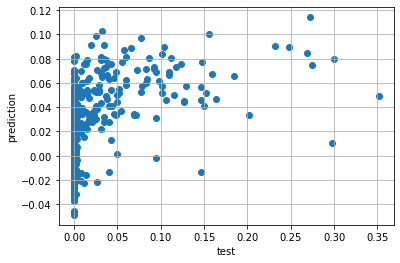

In [216]:
#plot to compare y_pred and y_test
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("test")
plt.ylabel("prediction")

C:\Users\farjamnia\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

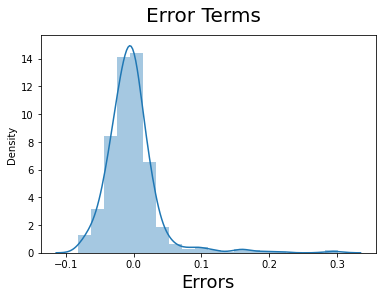

In [217]:
# plot the histogram of error terms
fig = plt.figure()
sns.distplot((y_test-y_pred),bins = 20)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Errors',fontsize = 18)

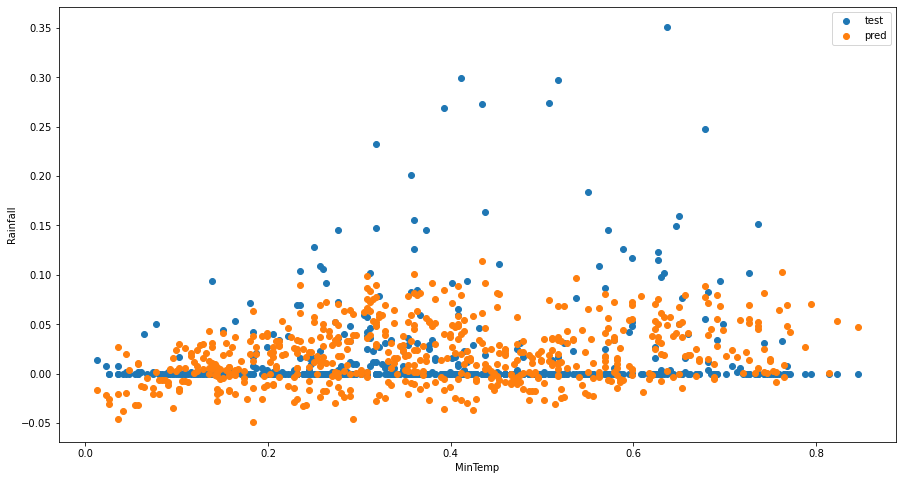

In [218]:
a = x_test.MinTemp
b = y_test
c = x_test.MinTemp
d = y_pred
plt.figure(figsize=(15,8))
plt.xlabel("MinTemp")
plt.ylabel("Rainfall")
plt.scatter(a,b,label ='test')
plt.scatter(c,d,label ='pred')
plt.legend(loc='upper right')
plt.show()

# add power 2 of features

In [219]:
pow2('Humidity3pm')
error(0.1)

Mean Absolute Error: 0.024404726938771642
Mean Squared Error: 0.0015126683737776102
Root Mean Squared Error: 0.038893037600290496
R2 score: 0.2975197850190493


In [220]:
#test size=0.2
error(0.2)

Mean Absolute Error: 0.024337615036734386
Mean Squared Error: 0.001524304000531397
Root Mean Squared Error: 0.0390423360024909
R2 score: 0.21220780373220605


In [221]:
#test size=0.3
error(0.3)

Mean Absolute Error: 0.026083626737943885
Mean Squared Error: 0.0031254266806388844
Root Mean Squared Error: 0.05590551565488762
R2 score: 0.2255714347869604


# raise the dimention of Humidity9am

In [222]:
pow2('Humidity9am')
error(0.1)

Mean Absolute Error: 0.024407249673735334
Mean Squared Error: 0.0015126644443894553
Root Mean Squared Error: 0.03889298708494187
R2 score: 0.2975216098191732


In [223]:
error(0.2)

Mean Absolute Error: 0.02434365881433386
Mean Squared Error: 0.0015243279676621596
Root Mean Squared Error: 0.03904264293899889
R2 score: 0.2121954170176299


In [224]:
error(0.3)

Mean Absolute Error: 0.0261166368235373
Mean Squared Error: 0.003126192303299485
Root Mean Squared Error: 0.05591236270539356
R2 score: 0.2253817262706107


# raise the dimention of WindGustSpeed

In [225]:
pow2('WindGustSpeed')
error(0.1)

Mean Absolute Error: 0.024510604635389812
Mean Squared Error: 0.0015018299753517075
Root Mean Squared Error: 0.03875345114117848
R2 score: 0.30255311591183676


In [226]:
pow2('WindSpeed3pm')
error(0.1)

Mean Absolute Error: 0.024518400122418283
Mean Squared Error: 0.0015014897139825059
Root Mean Squared Error: 0.038749060814199175
R2 score: 0.302711132621864


# add power 3 of features

In [227]:
def pow3(col):
    j = col+"3"
    n = df_Albury1[col]**3
    df1.insert(1, j, n)
    df1[[j]] = scaler.fit_transform(df1[[j]])
    x = df1

In [228]:
pow3('Humidity9am')
error(0.1)

Mean Absolute Error: 0.024513042174786646
Mean Squared Error: 0.001500168167784599
Root Mean Squared Error: 0.038732004437991574
R2 score: 0.3033248560746089


In [229]:
pow3('WindSpeed9am')
error(0.1)

Mean Absolute Error: 0.024406244184202782
Mean Squared Error: 0.0014952501088044252
Root Mean Squared Error: 0.03866846400885902
R2 score: 0.3056087929834329


In [230]:
pow3('WindGustSpeed')
error(0.1)

Mean Absolute Error: 0.024405620587644904
Mean Squared Error: 0.0014903684146837038
Root Mean Squared Error: 0.0386052899831578
R2 score: 0.30787584212311414


In [231]:
pow3('MinTemp')
error(0.1)

Mean Absolute Error: 0.02453493756860803
Mean Squared Error: 0.0014728969021641362
Root Mean Squared Error: 0.038378338970884815
R2 score: 0.31598957814321593


In [232]:
pow3('WindSpeed3pm')
error(0.1)

Mean Absolute Error: 0.024523953674736955
Mean Squared Error: 0.0014677889479483455
Root Mean Squared Error: 0.03831173381548198
R2 score: 0.3183617020256374


# add power 4 of features

In [233]:
def pow4(col):
    j = col+"4"
    n = df_Albury1[col]**4
    df1.insert(1, j, n)
    df1[[j]] = scaler.fit_transform(df1[[j]])
    x = df1

In [234]:
pow4('Pressure9am')
error(0.1)

Mean Absolute Error: 0.024236353147890747
Mean Squared Error: 0.0014469824906434342
Root Mean Squared Error: 0.0380392230552023
R2 score: 0.3280241798389635


In [235]:
pow4('Humidity9am')
error(0.1)

Mean Absolute Error: 0.024155495926187556
Mean Squared Error: 0.0014429564230392128
Root Mean Squared Error: 0.03798626624240941
R2 score: 0.32989387770874723


In [236]:
pow4('WindGustSpeed')
error(0.1)

Mean Absolute Error: 0.02416236316755691
Mean Squared Error: 0.00144277331003755
Root Mean Squared Error: 0.037983855913237004
R2 score: 0.32997891502624765


In [237]:
pow4('WindSpeed3pm')
error(0.1)

Mean Absolute Error: 0.024159937097260418
Mean Squared Error: 0.0014395713066854756
Root Mean Squared Error: 0.03794168297117928
R2 score: 0.3314659190795668


# add power 5 and 6 of features was not good

# add multiply of features

In [238]:
# produce multiply of columns
def dot(col1,col2):
    j = col1+col2
    n = df_Albury1[col1]*df_Albury1[col2]
    df1.insert(1, j, n)
    df1[[j]] = scaler.fit_transform(df1[[j]])
    x = df1

In [239]:
dot('Pressure9am','Humidity3pm')
error(0.1)

Mean Absolute Error: 0.02306244673003224
Mean Squared Error: 0.001412589831424009
Root Mean Squared Error: 0.03758443602641935
R2 score: 0.3439960630759302


In [240]:
dot('Pressure9am','Humidity9am')
error(0.1)

Mean Absolute Error: 0.02214446935393638
Mean Squared Error: 0.0013456894375401271
Root Mean Squared Error: 0.03668363991672755
R2 score: 0.37506447429715195


In [241]:
dot('Pressure9am','WindSpeed9am')
error(0.1)

Mean Absolute Error: 0.021903529170219777
Mean Squared Error: 0.0013014665747431444
Root Mean Squared Error: 0.0360758447543941
R2 score: 0.3956014847240419


In [242]:
dot('Pressure9am','Temp3pm')
error(0.1)

Mean Absolute Error: 0.02147119282321799
Mean Squared Error: 0.0012666256782078412
Root Mean Squared Error: 0.035589684997311244
R2 score: 0.41178152848811356


In [243]:
dot('Pressure9am','MaxTemp')
error(0.1)

Mean Absolute Error: 0.021458469033930366
Mean Squared Error: 0.0012659597132055834
Root Mean Squared Error: 0.03558032761520871
R2 score: 0.41209080132416


In [244]:
dot('Humidity3pm','Pressure3pm')
error(0.1)

Mean Absolute Error: 0.021171572053029095
Mean Squared Error: 0.0012549437039638157
Root Mean Squared Error: 0.035425184600278596
R2 score: 0.4172066143301949


In [245]:
dot('Humidity3pm','WindSpeed9am')
error(0.1)

Mean Absolute Error: 0.020841444077271308
Mean Squared Error: 0.0012267663626422225
Root Mean Squared Error: 0.03502522466226623
R2 score: 0.4302921161707288


In [246]:
dot('Humidity9am','WindSpeed9am')
error(0.1)

Mean Absolute Error: 0.020782221759583656
Mean Squared Error: 0.001225521590105076
Root Mean Squared Error: 0.035007450494217315
R2 score: 0.4308701860865515


In [247]:
dot('Humidity9am','MaxTemp')
error(0.1)

Mean Absolute Error: 0.020705966923890495
Mean Squared Error: 0.001223975008695413
Root Mean Squared Error: 0.03498535420280054
R2 score: 0.431588415448637


In [248]:
dot('Pressure3pm','MinTemp')
error(0.1)

Mean Absolute Error: 0.020694446289585944
Mean Squared Error: 0.0012238368644334082
Root Mean Squared Error: 0.034983379831477236
R2 score: 0.43165256937196483


In [249]:
dot('WindSpeed9am','Temp3pm')
error(0.1)

Mean Absolute Error: 0.02069558372402069
Mean Squared Error: 0.0012238305492832972
Root Mean Squared Error: 0.034983289572069934
R2 score: 0.4316555021152445


In [250]:
dot('WindSpeed9am','WindSpeed3pm')
error(0.1)

Mean Absolute Error: 0.020565705758201394
Mean Squared Error: 0.0012091120042377608
Root Mean Squared Error: 0.03477228787752915
R2 score: 0.43849076545982957


In [251]:
dot('WindSpeed9am','MaxTemp')
error(0.1)

Mean Absolute Error: 0.020568843394260402
Mean Squared Error: 0.0012090085761137929
Root Mean Squared Error: 0.03477080062514801
R2 score: 0.4385387972769942


In [252]:
dot('Temp3pm','MaxTemp')
error(0.1)

Mean Absolute Error: 0.020526480632837085
Mean Squared Error: 0.0012053509487124701
Root Mean Squared Error: 0.03471816453547725
R2 score: 0.4402373922418542


In [253]:
dot('Temp3pm','Temp9am')
error(0.1)

Mean Absolute Error: 0.020527513841552495
Mean Squared Error: 0.0012052796893167663
Root Mean Squared Error: 0.034717138265081215
R2 score: 0.4402704849649395


THE ABOVE  R2SCORE = 0.4402704849649395    IS THE BEST ONE THAT I COULD FOUND

In [254]:
x

date  Temp3pmTemp9am  Temp3pmMaxTemp  WindSpeed9amMaxTemp  \
0     0.000000        0.269706        0.239741             0.376893   
1     0.000335        0.306282        0.297985             0.082620   
2     0.000669        0.357402        0.290783             0.401827   
3     0.001004        0.351828        0.367466             0.253456   
4     0.001338        0.388013        0.481792             0.186060   
...        ...             ...             ...                  ...   
2985  0.998662        0.028314        0.091456             0.000000   
2986  0.998996        0.033047        0.070865             0.066162   
2987  0.999331        0.018030        0.040962             0.088134   
2988  0.999665        0.035417        0.074279             0.046412   
2989  1.000000        0.039278        0.027567             0.053818   

      WindSpeed9amWindSpeed3pm  WindSpeed9amTemp3pm  Pressure3pmMinTemp  \
0                     0.351906             0.394213            0.522273   
1                     0.064516             0.087884            0.329846   
2                     0.362170             0.398553            0.506881   
3                     0.072581             0.263562            0.389130   
4                     0.102639             0.187975            0.653263   
...                        ...                  ...                 ...   
2985                  0.000000             0.000000            0.131420   
2986                  0.000000             0.072152            0.118310   
2987                  0.013196             0.083002            0.127832   
2988                  0.043988             0.047378            0.127814   
2989                  0.000000             0.047740            0.218790   

      Humidity9amMaxTemp  Humidity9amWindSpeed9am  Humidity3pmWindSpeed9am  \
0               0.427717                 0.471761                 0.143369   
1               0.198497                 0.058472                 0.032584   
2               0.142323                 0.239867                 0.185728   
3               0.266889                 0.164452                 0.057348   
4               0.877236                 0.190698                 0.075269   
...                  ...                      ...                      ...   
2985            0.381170                 0.000000                 0.000000   
2986            0.302053                 0.199336                 0.129032   
2987            0.236121                 0.299003                 0.237537   
2988            0.332821                 0.132890                 0.063864   
2989            0.134675                 0.175415                 0.160313   

      ...   MaxTemp  WindGustSpeed  WindSpeed9am  WindSpeed3pm  Humidity9am  \
0     ...  0.423684       0.357143      0.540541          0.48     0.646341   
1     ...  0.481579       0.357143      0.108108          0.44     0.317073   
2     ...  0.497368       0.377551      0.513514          0.52     0.243902   
3     ...  0.557895       0.153061      0.297297          0.18     0.329268   
4     ...  0.671053       0.326531      0.189189          0.40     0.780488   
...   ...       ...            ...           ...           ...          ...   
2985  ...  0.221053       0.061224      0.000000          0.04     1.000000   
2986  ...  0.173684       0.081633      0.162162          0.00     1.000000   
2987  ...  0.134211       0.357143      0.243243          0.04     1.000000   
2988  ...  0.192105       0.193878      0.108108          0.30     1.000000   
2989  ...  0.107895       0.193878      0.162162          0.00     0.853659   

      Humidity3pm  Pressure9am  Pressure3pm   Temp9am   Temp3pm  
0        0.161290     0.357285     0.454887  0.485380  0.416216  
1        0.193548     0.415170     0.468045  0.494152  0.483784  
2        0.247312     0.355289     0.484962  0.605263  0.454054  
3        0.096774     0.554890     0.562030  0.520468  0.543243  
4        0.279570     0.419162     0.434

In [255]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.1 ,random_state = 0)
regressor = LinearRegression()
regressor.fit(x_train , y_train)
y_pred = regressor.predict(x_test)

Text(0, 0.5, 'prediction')

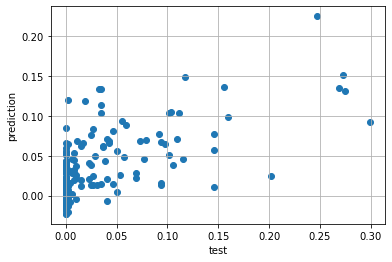

In [256]:
#plot to compare y_pred and y_test
plt.scatter(y_test,y_pred)
plt.grid()
plt.xlabel("test")
plt.ylabel("prediction")

In [257]:
compare = pd.DataFrame({'Actual':y_test,'Predict':y_pred})
compare

Actual   Predict
2572  0.000000  0.008567
1230  0.000000 -0.023012
316   0.000000  0.014566
2752  0.000000  0.013461
2189  0.000000  0.000243
...        ...       ...
2255  0.111324  0.103084
2750  0.000000 -0.007145
1550  0.005758  0.029285
943   0.007678  0.031920
1332  0.000000  0.059265

[299 rows x 2 columns]

In [258]:
print('intercept =',regressor.intercept_)
cdf = pd.DataFrame(regressor.coef_, x.columns, columns = ['coeficients'])
print(cdf)

intercept = -0.24827349135535295
                          coeficients
date                        -0.006191
Temp3pmTemp9am               0.005712
Temp3pmMaxTemp               0.019398
WindSpeed9amMaxTemp         -0.005965
WindSpeed9amWindSpeed3pm    -0.065775
WindSpeed9amTemp3pm          0.002273
Pressure3pmMinTemp          -0.869459
Humidity9amMaxTemp           0.241188
Humidity9amWindSpeed9am      0.164470
Humidity3pmWindSpeed9am     -0.021512
Humidity3pmPressure3pm       7.598724
Pressure9amMaxTemp           3.999654
Pressure9amTemp3pm         -12.944108
Pressure9amWindSpeed9am     -6.043249
Pressure9amHumidity9am     -11.140323
Pressure9amHumidity3pm     -13.353946
WindSpeed3pm4                0.487194
WindGustSpeed4               0.065479
Humidity9am4                 0.357101
Pressure9am4               144.267521
WindSpeed3pm3               -0.761684
MinTemp3                    -0.050422
WindGustSpeed3              -0.345916
WindSpeed9am3               -0.080258
Humidity9am3     

In [259]:
df_Albury.describe()

date      MinTemp      MaxTemp  WindGustSpeed  WindSpeed9am  \
count  2990.000000  2990.000000  2990.000000    2990.000000   2990.000000   
mean   1494.500000     9.509465    22.635318      32.981522      8.193980   
std     863.282978     6.067467     7.814568      13.378650      6.742392   
min       0.000000    -2.800000     6.800000       9.000000      0.000000   
25%     747.250000     4.700000    15.800000      24.000000      4.000000   
50%    1494.500000     9.100000    21.900000      31.000000      7.000000   
75%    2241.750000    14.300000    28.900000      41.000000     11.000000   
max    2989.000000    28.300000    44.800000     107.000000     37.000000   

       WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  Pressure3pm  \
count   2990.000000  2990.000000  2990.000000  2990.000000  2990.000000   
mean      14.393980    74.083946    47.822742  1018.363545  1015.747759   
std        7.222921    17.434712    19.789728     7.366357     7.119792   
min        0.000000    18.000000     7.000000   989.800000   982.900000   
25%        9.000000    61.000000    33.000000  1013.400000  1010.700000   
50%       13.000000    76.000000    47.000000  1018.400000  1015.600000   
75%       19.000000    88.000000    60.000000  1023.300000  1020.500000   
max       50.000000   100.000000   100.000000  1039.900000  1036.100000   

           Temp9am      Temp3pm     Rainfall  
count  2990.000000  2990.000000  2990.000000  
mean     14.343445    21.369097     1.892843  
std       6.381408     7.539110     6.184092  
min       0.300000     6.400000     0.000000  
25%       9.200000    14.900000     0.000000  
50%      14.100000    20.600000     0.000000  
75%      19.300000    27.200000     0.400000  
max      34.500000    43.400000   104.200000

In [265]:
MinTemp = float(input("The MinTemp is :"))                     
MaxTemp = float(input("The MaxTemp is :"))                    
WindGustSpeed = float(input("The WindGustSpeed is :"))              
WindSpeed9am = float(input("The WindSpeed9am is :"))               
WindSpeed3pm = float(input("The WindSpeed3pm is :"))              
Humidity9am = float(input("The Humidity9am is :"))               
Humidity3pm = float(input("The Humidity3pm is :"))             
Pressure9am = float(input("The Pressure9am is :"))             
Pressure3pm = float(input("The Pressure3pm is :"))               
Temp9am = float(input("The Temp9am is :"))              
Temp3pm = float(input("The Temp3pm is :"))

The MinTemp is :7.4
The MaxTemp is :25.1
The WindGustSpeed is :44
The WindSpeed9am is :4
The WindSpeed3pm is :22
The Humidity9am is :44
The Humidity3pm is :25
The Pressure9am is :1010.6
The Pressure3pm is :1007.8
The Temp9am is :17.2
The Temp3pm is :24.3


In [266]:
# normalizing inputs
Temp3pm_n = (Temp3pm - 6.4)/(43.4-6.4)
Temp9am_n = (Temp9am - 0.3)/(34.5-0.3)
Pressure3pm_n = (Pressure3pm - 982.9)/(1036.1 - 982.9)
Pressure9am_n = (Pressure9am - 989.8)/(1039.9- 989.8)
Humidity3pm_n = (Humidity3pm -7)/(100 - 7)
Humidity9am_n = (Humidity9am -18)/(100-18)
WindSpeed3pm_n = (WindSpeed3pm)/50
WindSpeed9am_n = (WindSpeed9am)/37
WindGustSpeed_n = (WindGustSpeed -9)/(107 - 9)
MaxTemp_n = (MaxTemp - 6.8)/(44.8 - 6.8)
MinTemp_n = (MinTemp + 2.8)/(28.3+2.8)
Pressure9am2 = (Pressure9am**2 - 989.8*989.8)/(1030.9*1039.9 - 989.8*989.8)
Humidity3pm2 = (Humidity3pm**2 - 7*7)/(100*100 -7*7)
Humidity9am2 = (Humidity9am**2 -18*18)/(100*100 -18*18)
WindGustSpeed2 = (WindGustSpeed**2- 9*9)/(107*107 - 9*9)
WindSpeed3pm2 = (WindSpeed3pm**2)/(50*50)
Humidity9am3 = (Humidity9am**3 -18*18*18)/(100*100*100 - 18*18*18)
WindSpeed9am3= (WindSpeed9am**3 )/(37*37*37)
WindGustSpeed3= (WindGustSpeed**3-9*9*9)/(107**3-9**3)
MinTemp3 =(MinTemp**3+2.8**3 )/(28.3**3 - 2.8**3)
WindSpeed3pm3 = (WindSpeed3pm**3)/(50**3)
Pressure9am4 = (Pressure9am**4- 989.9**4)/(1039.9**4 -989.9**4)
Humidity9am4 = (Humidity9am**4- 18**4)/(100**4- 18**4)
WindGustSpeed4 =(WindGustSpeed**4-9**4)/(107**4-9**4) 
WindSpeed3pm4 =(WindSpeed3pm**4)/50**4
Pressure9amHumidity3pm = (Pressure9am*Humidity3pm - 989.8*7)/(1039.9*100- 989.8*7)
Pressure9amHumidity9am = (Pressure9am*Humidity9am- 989.8*18)/(1039.9*100- 989.8*18)
Pressure9amWindSpeed9am = (Pressure9am*WindSpeed9am)/(989.8*37)
Pressure9amTemp3pm = (Pressure9am*Temp3pm - 989.8*6.4)/(1039.9*43.4 - 989.8*6.4)
Pressure9amMaxTemp = (Pressure9am*MaxTemp - 989.8*6.8)/(1039.9*44.8 -989.8*6.8)
Humidity3pmPressure3pm = (Humidity3pm*Pressure3pm -7*982.9)/(100*1036.1-7*982.9)
Humidity3pmWindSpeed9am = (Humidity3pm*WindSpeed9am)/(100*37)
Humidity9amWindSpeed9am = (Humidity9am*WindSpeed9am)/(100*37)
Humidity9amMaxTemp = (Humidity9am*MaxTemp -18*6.8)/(100*44.8 -18*6.8)
Pressure3pmMinTemp = (Pressure3pm*MinTemp +982.9*2.8)/(1036.1*28.3+982.9*2.8)
WindSpeed9amTemp3pm = (WindSpeed9am*Temp3pm)/(37*43.4)
WindSpeed9amWindSpeed3pm =(WindSpeed9am*WindSpeed3pm )/(37*50)
WindSpeed9amMaxTemp = (WindSpeed9am*MaxTemp)/(37*44.8)
Temp3pmMaxTemp = (Temp3pm*MaxTemp-6.4*6.8)/(43.5*44.8 -6.4*6.8)
Temp3pmTemp9am = (Temp3pm*Temp9am -6.4*0.3)/(43.5*34.5-6.4*0.3)




In [267]:
y_normal =(-0.24827349135535295 + Temp3pm*13.188236 + Temp9am*0.056347 + Pressure3pm*0.062305
                         + Pressure9am*290.184875 + Humidity3pm*5.687491 + Humidity9am*9.663793
                         + WindSpeed3pm*(-0.105359) + WindSpeed9am*6.064544 + WindGustSpeed*(-0.073453)
                         + MaxTemp*(-4.473968) + MinTemp*0.926858 + Pressure9am2*(-433.528533)
                         + Humidity3pm2*0.046300 + Humidity9am2*1.573145 + WindGustSpeed2*0.339172
                         + WindSpeed3pm2*0.448600 + Humidity9am3*(-1.0054910) + WindSpeed9am3*(-0.080258)
                         + WindGustSpeed3*(-0.345916) + MinTemp3*-0.050422 + WindSpeed3pm3*-0.761684
                         + Pressure9am4*144.267521 + Humidity9am4*0.357101 + WindGustSpeed4*0.065479
                         + WindSpeed3pm4*0.487194 + Pressure9amHumidity3pm*-13.353946 + Pressure9amHumidity9am*-11.140323
                         + Pressure9amWindSpeed9am*-6.043249 + Pressure9amTemp3pm*-12.944108 + Pressure9amMaxTemp*3.999654
                         + Humidity3pmPressure3pm*7.598724 + Humidity3pmWindSpeed9am*-0.021512 + Humidity9amWindSpeed9am*0.164470
                         + Humidity9amMaxTemp*0.241188 + Pressure3pmMinTemp*-0.869459 + WindSpeed9amTemp3pm*0.002273
                         + WindSpeed9amWindSpeed3pm*-0.065775 + WindSpeed9amMaxTemp*-0.005965 + Temp3pmMaxTemp*0.019398
                         + Temp3pmTemp9am+0.005712)

In [268]:
y_predidtion = y_normal*104.2  # change normalize to ordinary

if y_predidtion<0:
    y_predidtion =0

print("y_predidtion is: ",y_predidtion)

30632528.19330161
y_predidtion is:  104.2
